# Travel Package Purchase Prediction

### Description

### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary

### Customer details:

    1. CustomerID: Unique customer ID
    2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    3. Age: Age of customer
    4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
    6. Occupation: Occupation of customer
    7. Gender: Gender of customer
    8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    9. PreferredPropertyStar: Preferred hotel property rating by customer
    10. MaritalStatus: Marital status of customer
    11. NumberOfTrips: Average number of trips in a year by customer
    12. Passport: The customer has a passport or not (0: No, 1: Yes)
    13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    15. Designation: Designation of the customer in the current organization
    16. MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

    1. PitchSatisfactionScore: Sales pitch satisfaction score
    2. ProductPitched: Product pitched by the salesperson
    3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
    4. DurationOfPitch: Duration of the pitch by a salesperson to the customer


## Importing Libraries

In [157]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBRegressor, XGBClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# (Greatlearning Login)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matrix

# (TravelPackagePrediction-Ensemble Techniques)

In [2]:
# loaning data
url = 'Tourism.xlsx'
data = pd.read_excel(url, sheet_name = 'Tourism') # reading the 'Tourism' tab of the excel file. There are two worksheets in this excel file 'Data Dict' and 'Tourism'.

# (Python Read Multiple Excel Sheets)

In [3]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")
#checking the shape of the dataset
np.random.seed(15) 
data.sample(10) #loading random 10 rows

# (Greatlearning Login)

There are 4888 rows and 20 columns.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4019,204019,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Married,NaN,0,1,0,2.0,VP,37522.0
1365,201365,1,29.0,Company Invited,3,30.0,Large Business,Male,2,1.0,Basic,5.0,Single,2.0,0,3,1,1.0,Executive,16091.0
473,200473,0,49.0,Self Enquiry,1,24.0,Salaried,Male,2,4.0,King,3.0,Married,2.0,1,3,0,1.0,VP,34502.0
2554,202554,0,52.0,Company Invited,1,7.0,Small Business,Fe Male,2,5.0,Standard,5.0,Unmarried,5.0,0,2,1,1.0,Senior Manager,26162.0
1492,201492,0,34.0,Self Enquiry,1,13.0,Salaried,Fe Male,2,3.0,Standard,4.0,Unmarried,1.0,0,5,0,0.0,Senior Manager,26994.0
3809,203809,1,30.0,Company Invited,3,NaN,Large Business,Male,3,2.0,Basic,5.0,Single,3.0,0,3,1,2.0,Executive,19769.0
4385,204385,0,39.0,Self Enquiry,1,17.0,Small Business,Female,4,4.0,Deluxe,3.0,Married,5.0,0,3,0,2.0,Manager,28502.0
521,200521,0,27.0,Company Invited,3,NaN,Small Business,Female,3,2.0,Deluxe,3.0,Married,2.0,1,2,1,2.0,Manager,19647.0
4358,204358,0,49.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,Deluxe,3.0,Married,4.0,0,5,1,1.0,Manager,22729.0
475,200475,0,26.0,Self Enquiry,3,34.0,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,3,1,0.0,Manager,21272.0


In [4]:
# making a copy of dataset to avoid changing the original data
df = data.copy()

# (Greatlearning Login)

In [5]:
df.isnull().sum().sort_values(ascending=False)

# (Greatlearning Login)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [6]:
df.describe().T # getting statistical summary of dataset

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


* Age: the average age is 38 years old, ages are ranging from 18 to 61; 75% of the customers are 44 years old and younger, stopping at 18.
* DurationofPitch: the salesperson is pitching to the customer on average of 16 minutes, pitches are ranging from 5 to 20 minutes with 127 minutes (over two hours) as an outlier.
* NumberOfPersonVisiting: on average 3 people plan to take the trip with the customer.
* NumberOfFollowups: on average salesperson(s) follow up 3.7 times after sales pitch. 
* PreferredPropertyStar: on average hotel property rating by customer is 3.6.
* NumberOfTrips: on average customers are taking 3.2 trips per year, with an outlier of 22 trips in one year.
* PitchSatisfactionScore: on average 3 is the sales pitch satisfaction score.
* NumberOfChildrenVisiting: on average 1.1 children with age less than 5 plan to take the trip with the customer.
* MonthlyIncome: the average income is 23619.85, the maximum monthly income is 98678.





In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [8]:
for feature in df.columns: # Loop through all columns in the dataframe
  if df[feature].dtype == 'object': # Only apply for columns with categorical strings
    df[feature] = pd.Categorical(df[feature]) # Replace strings with an integer
df.head(10)

# (Greatlearning Login)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [9]:
print(df.TypeofContact.value_counts())
print(df.Occupation.value_counts())
print(df.Gender.value_counts())
print(df.ProductPitched.value_counts())
print(df.MaritalStatus.value_counts())
print(df.Designation.value_counts())

# (Greatlearning Login)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


### Gender Female and Fe Male are the same. Converting both into Female.

In [10]:
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

# (TravelPackagePrediction-Ensemble Techniques)

In [11]:
df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [12]:
replaceStruct = {
                "TypeofContact":     {"Self Enquiry": 0, "Company Invited": 1},
                "Occupation": {"Salaried": 1, "Small Businee":2 , "Large Business": 3, "Free Lancer": 4},
                 "Gender": {"Male": 0, "Female":1},
                 "ProductPitched":     {"Basic": 1, "Deluxe": 2 ,"Standard": 3 ,"Super Deluxe": 4 ,"King": 5},
                "MaritalStatus":     {"Married": 1, "Divorced": 2, 'Signle': 3, 'Unmarried': 4},
                "Designation":     {"Executive": 0, "Manager": 1, 'Senior Manager': 3, 'AVP': 4, 'VP': 5} 
                    }


# (Greatlearning Login)

In [13]:
df = df.replace(replaceStruct)
df = pd.get_dummies(df)
df.head(10)

# (Greatlearning Login)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Occupation_1,Occupation_3,Occupation_4,Occupation_Small Business,MaritalStatus_1,MaritalStatus_2,MaritalStatus_4,MaritalStatus_Single
0,200000,1,41.0,0.0,3,6.0,1,3,3.0,2,3.0,1.0,1,2,1,0.0,1,20993.0,1,0,0,0,0,0,0,1
1,200001,0,49.0,1.0,1,14.0,0,3,4.0,2,4.0,2.0,0,3,1,2.0,1,20130.0,1,0,0,0,0,1,0,0
2,200002,1,37.0,0.0,1,8.0,0,3,4.0,1,3.0,7.0,1,3,0,0.0,0,17090.0,0,0,1,0,0,0,0,1
3,200003,0,33.0,1.0,1,9.0,1,2,3.0,1,3.0,2.0,1,5,1,1.0,0,17909.0,1,0,0,0,0,1,0,0
4,200004,0,NaN,0.0,1,8.0,0,2,3.0,1,4.0,1.0,0,5,1,0.0,0,18468.0,0,0,0,1,0,1,0,0
5,200005,0,32.0,1.0,1,8.0,0,3,3.0,1,3.0,1.0,0,5,1,1.0,0,18068.0,1,0,0,0,0,0,0,1
6,200006,0,59.0,0.0,1,9.0,1,2,2.0,1,5.0,5.0,1,2,1,1.0,0,17670.0,0,0,0,1,0,1,0,0
7,200007,0,30.0,0.0,1,30.0,0,3,3.0,1,3.0,2.0,0,2,0,1.0,0,17693.0,1,0,0,0,1,0,0,0
8,200008,0,38.0,1.0,1,29.0,0,2,4.0,3,3.0,1.0,0,3,0,0.0,3,24526.0,1,0,0,0,0,0,1,0
9,200009,0,36.0,0.0,1,33.0,0,3,3.0,2,3.0,7.0,0,3,1,0.0,1,20237.0,0,0,0,1,0,1,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 4888 non-null   int64  
 1   ProdTaken                  4888 non-null   int64  
 2   Age                        4662 non-null   float64
 3   TypeofContact              4863 non-null   float64
 4   CityTier                   4888 non-null   int64  
 5   DurationOfPitch            4637 non-null   float64
 6   Gender                     4888 non-null   int64  
 7   NumberOfPersonVisiting     4888 non-null   int64  
 8   NumberOfFollowups          4843 non-null   float64
 9   ProductPitched             4888 non-null   int64  
 10  PreferredPropertyStar      4862 non-null   float64
 11  NumberOfTrips              4748 non-null   float64
 12  Passport                   4888 non-null   int64  
 13  PitchSatisfactionScore     4888 non-null   int64

In [15]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'Occupation_1', 'Occupation_3', 'Occupation_4',
       'Occupation_Small Business', 'MaritalStatus_1', 'MaritalStatus_2',
       'MaritalStatus_4', 'MaritalStatus_Single'],
      dtype='object')

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
TypeofContact,4863.0,0.291795,0.454635,0.0,0.00,0.0,1.00,1.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
Gender,4888.0,0.403437,0.490637,0.0,0.00,0.0,1.00,1.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
ProductPitched,4888.0,2.056056,1.108651,1.0,1.00,2.0,3.00,5.0


In [17]:
## Converting the data type of categorical features to 'category'

cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus_1','MaritalStatus_2', 'MaritalStatus_4',
            'ProductPitched','Gender','Occupation_1','Occupation_3','Occupation_4','TypeofContact'
            ]
df[cat_cols] = df[cat_cols].astype('category')
df.info()

# (TravelPackagePrediction-Ensemble Techniques)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CustomerID                 4888 non-null   int64   
 1   ProdTaken                  4888 non-null   category
 2   Age                        4662 non-null   float64 
 3   TypeofContact              4863 non-null   category
 4   CityTier                   4888 non-null   category
 5   DurationOfPitch            4637 non-null   float64 
 6   Gender                     4888 non-null   category
 7   NumberOfPersonVisiting     4888 non-null   int64   
 8   NumberOfFollowups          4843 non-null   float64 
 9   ProductPitched             4888 non-null   category
 10  PreferredPropertyStar      4862 non-null   float64 
 11  NumberOfTrips              4748 non-null   float64 
 12  Passport                   4888 non-null   category
 13  PitchSatisfactionScore     4888 n

In [18]:
df.nunique()

CustomerID                   4888
ProdTaken                       2
Age                            44
TypeofContact                   2
CityTier                        3
DurationOfPitch                34
Gender                          2
NumberOfPersonVisiting          5
NumberOfFollowups               6
ProductPitched                  5
PreferredPropertyStar           3
NumberOfTrips                  12
Passport                        2
PitchSatisfactionScore          5
OwnCar                          2
NumberOfChildrenVisiting        4
Designation                     5
MonthlyIncome                2475
Occupation_1                    2
Occupation_3                    2
Occupation_4                    2
Occupation_Small Business       2
MaritalStatus_1                 2
MaritalStatus_2                 2
MaritalStatus_4                 2
MaritalStatus_Single            2
dtype: int64

### Dropping column which are not adding any information.

In [19]:
df.drop(['CustomerID'], axis=1, inplace=True)

# (Greatlearning Login)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ProdTaken                  4888 non-null   category
 1   Age                        4662 non-null   float64 
 2   TypeofContact              4863 non-null   category
 3   CityTier                   4888 non-null   category
 4   DurationOfPitch            4637 non-null   float64 
 5   Gender                     4888 non-null   category
 6   NumberOfPersonVisiting     4888 non-null   int64   
 7   NumberOfFollowups          4843 non-null   float64 
 8   ProductPitched             4888 non-null   category
 9   PreferredPropertyStar      4862 non-null   float64 
 10  NumberOfTrips              4748 non-null   float64 
 11  Passport                   4888 non-null   category
 12  PitchSatisfactionScore     4888 non-null   int64   
 13  OwnCar                     4888 n

In [21]:
df.describe(include=['category']).T

# (TravelPackagePrediction-Ensemble Techniques)

,count,unique,top,freq
ProdTaken,4888.0,2.0,0.0,3968.0
TypeofContact,4863.0,2.0,0.0,3444.0
CityTier,4888.0,3.0,1.0,3190.0
Gender,4888.0,2.0,0.0,2916.0
ProductPitched,4888.0,5.0,1.0,1842.0
Passport,4888.0,2.0,0.0,3466.0
OwnCar,4888.0,2.0,1.0,3032.0
Designation,4888.0,5.0,0.0,1842.0
Occupation_1,4888.0,2.0,0.0,2520.0
Occupation_3,4888.0,2.0,0.0,4454.0


### Giving Age a closer look

In [22]:
df.Age.describe() 

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

In [23]:
# Converting the different ages into bins to observe any patterns 
df['Agebin'] = pd.cut(df['Age'], bins = [18, 25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

# (TravelPackagePrediction-Ensemble Techniques)

In [24]:
df.Agebin.value_counts()

# (TravelPackagePrediction-Ensemble Techniques)

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64

* The majority of the ages fall in the 31-40 year old range. 
* Ages 41-50 are second, indicating that customers between the ages of 31-50 are good target segment.

### Giving MonthlyIncome a closer look

In [25]:
df.MonthlyIncome.describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [26]:
# Converting the different monthly incomes into bins to observe any patterns 
df['Incomebin'] = pd.cut(df['MonthlyIncome'], bins = [0, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

# (TravelPackagePrediction-Ensemble Techniques)

In [27]:
df.Incomebin.value_counts()

<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: Incomebin, dtype: int64

* The majority of customers have a monthly income of less than 25,000 
* Less than 20,000 is second, indicating that customers with monthly incomes less than 20,000 - 25,000 thousands of dollars are good target segments.


### Let's look at the unqiue values of all the categories

In [28]:
cols_cat= df.select_dtypes(['category'])

In [29]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)
    
# (Greatlearning Login)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in TypeofContact are :
0.0    3444
1.0    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Gender are :
0    2916
1    1972
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
1    1842
2    1732
3     742
4     342
5     230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in Passport are :
0    3466
1    1422
Name: Passport, dtype: int64
**************************************************
Unique values in OwnCar are :
1    3032
0    1856
Name: OwnCar, dtype: int64
**************************************************
Unique values in

# Exploratory Data Analysis (EDA)

### Defining the three functions needed to carry out the Exploratory Data Analysis.

In [30]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    # (Greatlearning Login)

In [31]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
    # (Greatlearning Login)

# Univariate Analysis

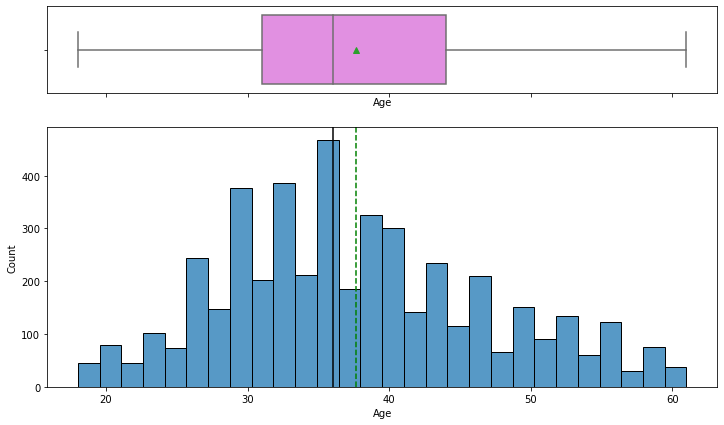

In [32]:
histogram_boxplot(df,'Age')

* Age is normally distributed.
* The average age is 38. 

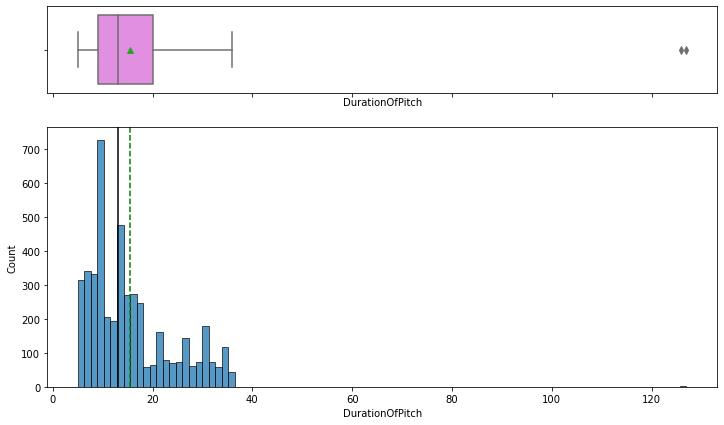

In [33]:
histogram_boxplot(df,'DurationOfPitch')

* 'DurationOfPitch' is right skewed with two outliers. 
* The average duration of pitch is 16 minutes. The maximum duration of pitch is 127 minutes. 

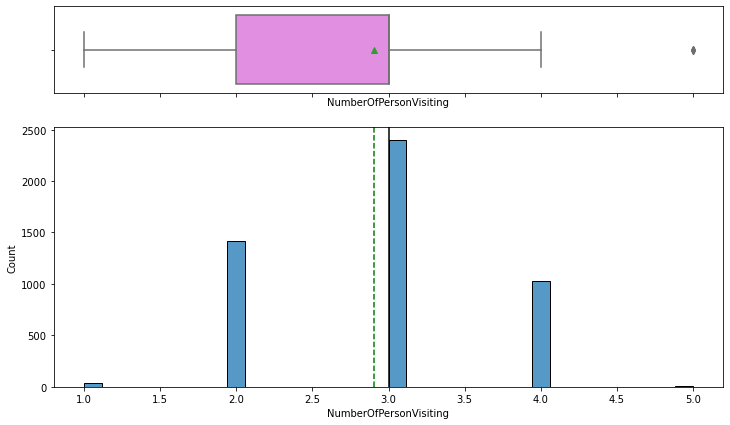

In [34]:
histogram_boxplot(df,'NumberOfPersonVisiting')

* 'NumberOfPersonVisiting' is slightly left skewed, the average persons's planning to take the trip with the customer is 3, with one outlier of 5 persons.

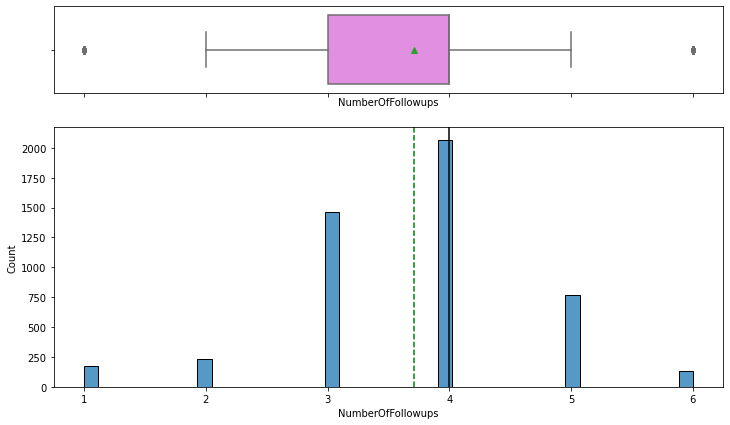

In [35]:
histogram_boxplot(df,'NumberOfFollowups')

* The average 'NumberOfFollowups' is 3.7, with two outliers 1 and 6.  

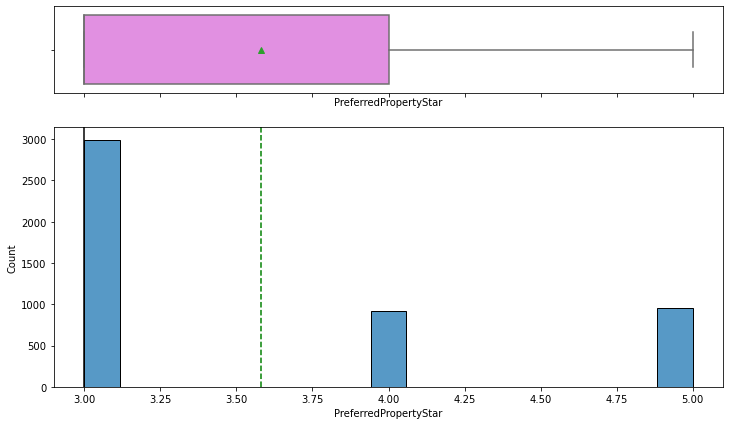

In [36]:
histogram_boxplot(df,'PreferredPropertyStar')

* The average 'PreferredPropertyStar' rating is 3.6 and is right skewed.

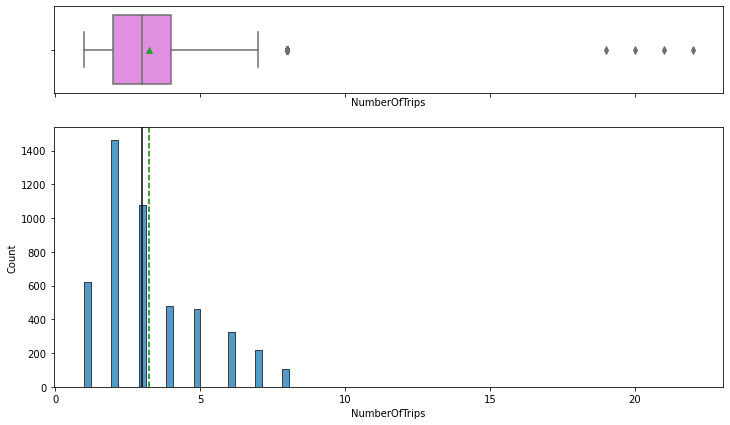

In [37]:
histogram_boxplot(df,'NumberOfTrips')

* The average 'NumberOfTrips' is 3.2 and it is right skewed with several outliers. The maximum outlier is 22.

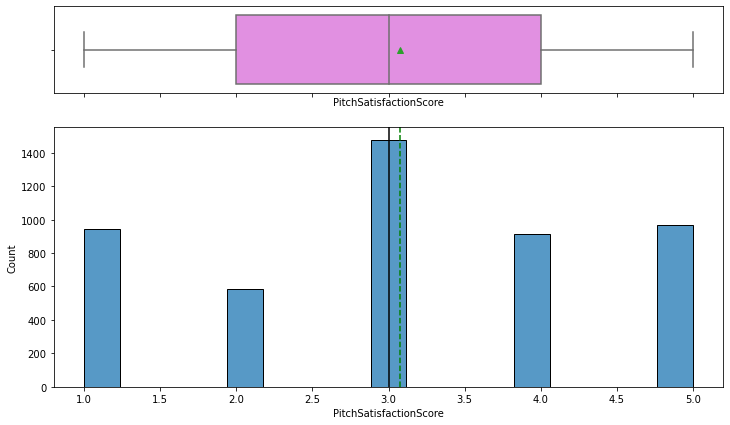

In [38]:
histogram_boxplot(df,'PitchSatisfactionScore')

* The average 'PitchSatisfactionScore' is 3 and is normally distributed. 

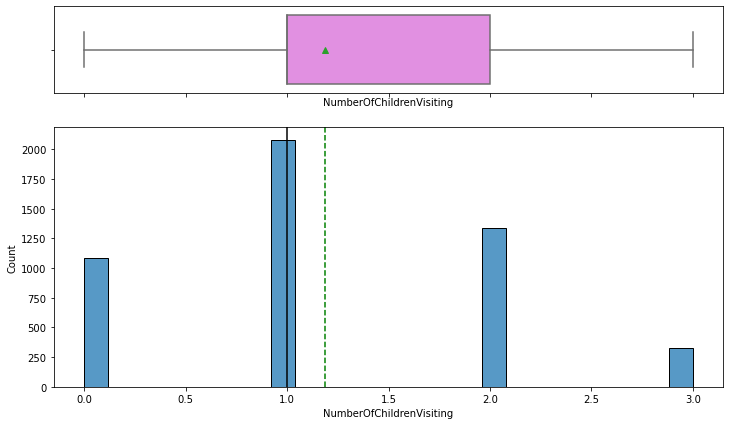

In [39]:
histogram_boxplot(df,'NumberOfChildrenVisiting')

* The average 'NumberOfChildrenVisiting' is 1.2 and is slightly right skewed.

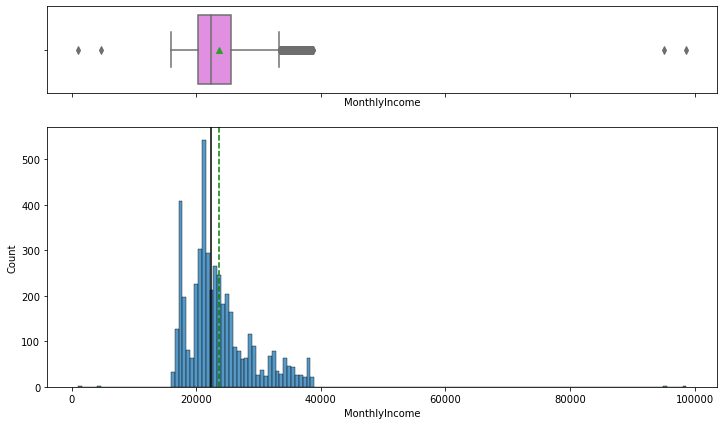

In [40]:
histogram_boxplot(df,'MonthlyIncome')

* The average 'MonthlyIncome' is 23,619 dollars and is right skewed with several outliers. The minimum 'MonthlyIncome' is 1,000 dollars and the maximum 'MonthlyIncome' is 98678 dollars. 

### Observations on Type of Contact

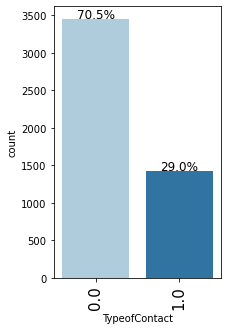

In [41]:
labeled_barplot(df,'TypeofContact', perc=True)

* 71% are Self Inquiry and 29% are Company Invited

### Observations on City Tier

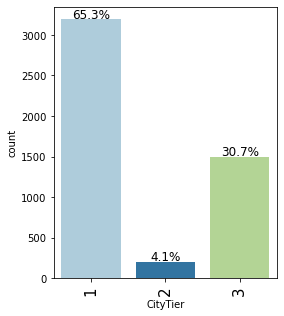

In [42]:
labeled_barplot(df,'CityTier', perc=True)

* Tier 1 has the most customers at 65%, followed by Tier 3 with 31%.

### Observations on Occupations

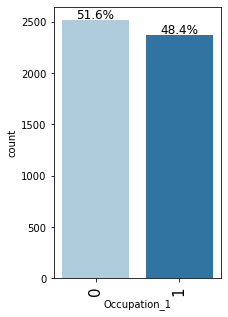

In [43]:
labeled_barplot(df,'Occupation_1', perc=True)

* There is little difference with Salaried customers

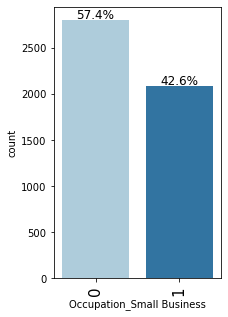

In [44]:
labeled_barplot(df,'Occupation_Small Business', perc=True)

* 57% of the Small Business customers have not purchased a package.

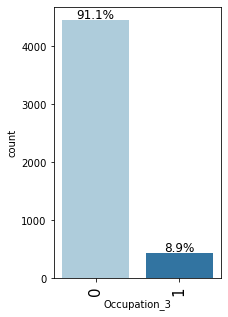

In [45]:
labeled_barplot(df,'Occupation_3', perc=True)

* 91% of Large Business customers have not purchased a package.

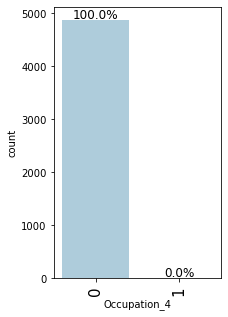

In [46]:
labeled_barplot(df,'Occupation_4', perc=True)

* 100% of Free Lancer customers have not purchase a package.

### Observations on Genders

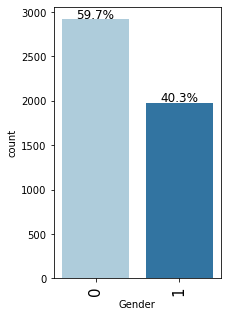

In [47]:
labeled_barplot(df,'Gender', perc=True)

* Males has the most customers at 60%

### Observations on Number Of Person Visiting

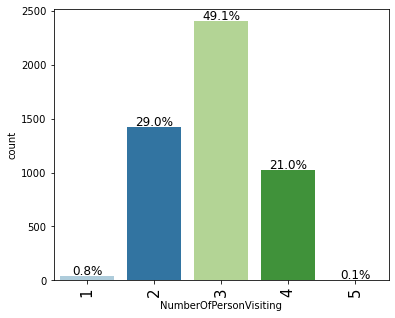

In [48]:
labeled_barplot(df,'NumberOfPersonVisiting', perc=True)

* 3 persons planning to take the trip with the customer has the most with 49% followed by 2 persons at 29%.

### Observations on Number Of Followups

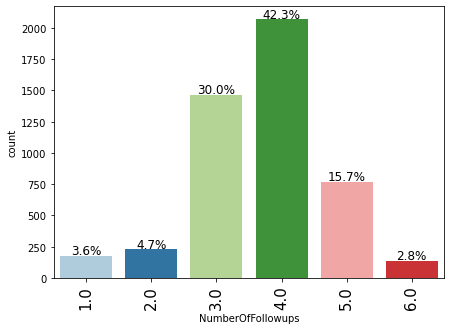

In [49]:
labeled_barplot(df,'NumberOfFollowups', perc=True)

* Generally, 4 total number of follow-ups has been done by the salesperson after the sales pitch at 42%, followed by 3 total number of follow-ups at 30%.

### Observations on Product Pitched

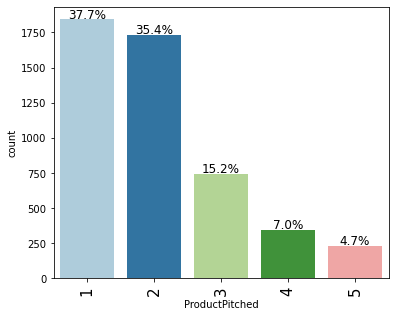

In [50]:
labeled_barplot(df,'ProductPitched', perc=True)

* 38% of the salespersons pitch one product and 35% of the salesperson pitch two products.  

### Observations on Preferred Property Star

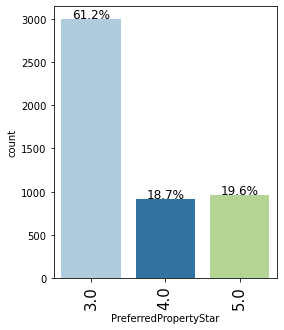

In [51]:
labeled_barplot(df,'PreferredPropertyStar', perc=True)

* Three stars has the most at 61%.

### Observations on Marital Status

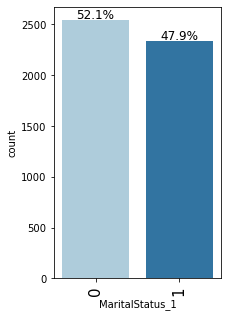

In [52]:
labeled_barplot(df,'MaritalStatus_1', perc=True)

* 52% of the Married customers have not purchased a package

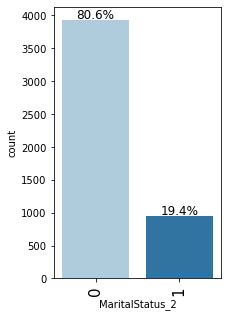

In [53]:
labeled_barplot(df,'MaritalStatus_2', perc=True)

* 81% of the Divorced customers have not purchased a package

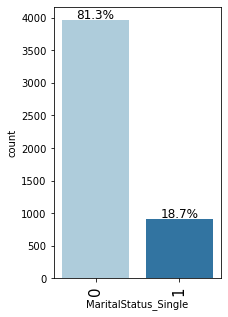

In [54]:
labeled_barplot(df,'MaritalStatus_Single', perc=True)

* 81% of the Single customers have not purchased a package

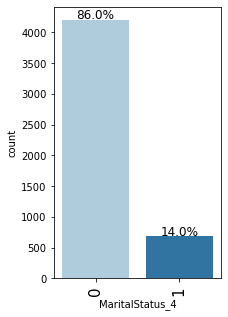

In [55]:
labeled_barplot(df,'MaritalStatus_4', perc=True)

* 86% of the Unmarried customers have not purchased a package

### Observations on Number Of Trips

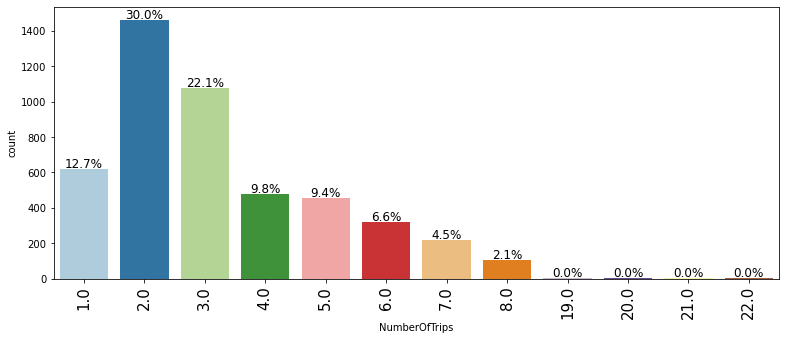

In [56]:
labeled_barplot(df,'NumberOfTrips', perc=True)

* 30% of the customers average 2 trips in a year.

### Observations on Passport

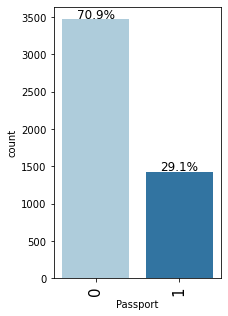

In [57]:
labeled_barplot(df,'Passport', perc=True)

* 71% of the customer do not have a passport.

### Observations on Pitch Satisfaction Score

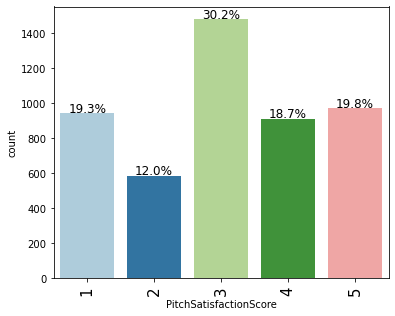

In [58]:
labeled_barplot(df,'PitchSatisfactionScore', perc=True)

* 30% of the salespersons are averaging a pitch satisfaction score of 3.

### Observations on Own Car

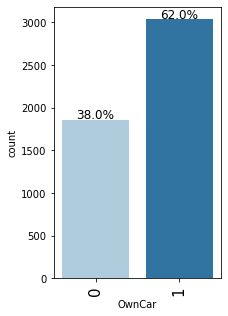

In [59]:
labeled_barplot(df,'OwnCar', perc=True)

* 38% of the customers do not own a car.

### Observations on Number Of Children Visiting

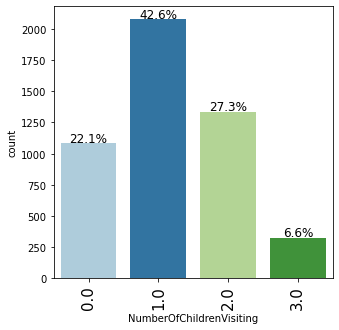

In [60]:
labeled_barplot(df,'NumberOfChildrenVisiting', perc=True)

* 43% of the customers have 1 child with age less than 4 planning to take the trip.

### Observations on Designation

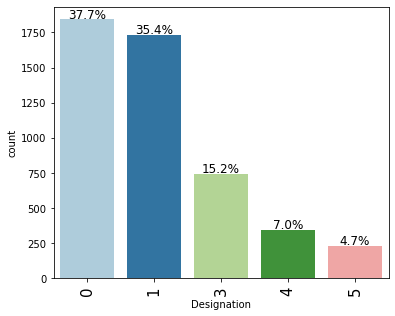

In [61]:
labeled_barplot(df,'Designation', perc=True)

Below is the order of designation:
* Executive 38%
* Manager 35%
* Senior Manager 15%
* AVP 7%
* VP 5%

    * Executive and Manager designations have the most
   

### Observations on Age Bin

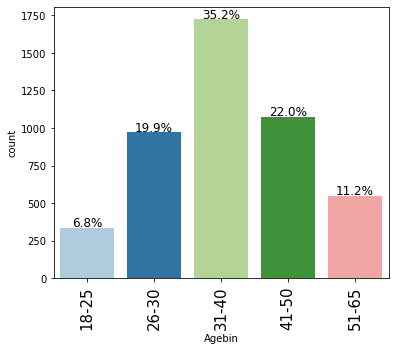

In [62]:
labeled_barplot(df,'Agebin', perc=True)

* Ages of customers between 31-40 are the most at 35%
* Ages of customers between 41-50 and 26-30 are close at 22% and 20% respectively

### Observations on Income Bin

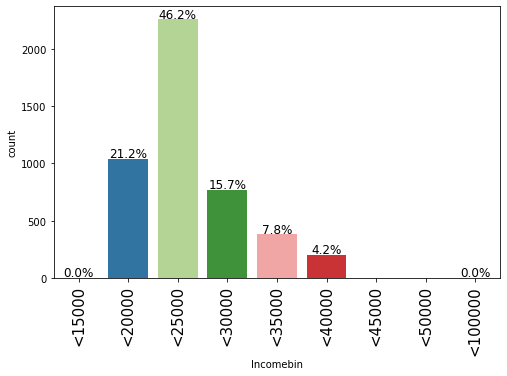

In [63]:
labeled_barplot(df,'Incomebin', perc=True)

* Monthly incomes less than 25,000 dollars has the most at 46%, followed by monthly incomes less than 20,000 dollars at 21%

## Univariate Analysis Observations

* Age is normally distributed.
* The average age is 38.
* 'DurationOfPitch' is right skewed with two outliers.
* The average duration of pitch is 16 minutes. The maximum duration of pitch is 127 minutes.
* 'NumberOfPersonVisiting' is slightly left skewed, the average person’s planning to take the trip with the customer is 3, with one outlier of 5 persons.
* The average 'NumberOfFollowups' is 3.7, with two outliers 1 and 6.
* The average 'PreferredPropertyStar' rating is 3.6 and is right skewed.
* The average 'NumberOfTrips' is 3.2 and it is right skewed with several outliers. The maximum outlier is 22.
* The average 'PitchSatisfactionScore' is 3 and is normally distributed.
* The average 'NumberOfChildrenVisiting' is 1.2 and is slightly right skewed.
* The average 'MonthlyIncome' is 23,619 dollars and is right skewed with several outliers. The minimum 'MonthlyIncome' is 1,000 dollars and the maximum 'MonthlyIncome' is 98678 dollars.
* 71% are Self Inquiry and 29% are Company Invited
* Tier 1 has the most customers at 65%, followed by Tier 3 with 31%.
* There is little difference with Salaried customers
* 57% of the Small Business customers have not purchased a package.
* 91% of Large Business customers have not purchased a package.
* 100% of Free Lancer customers have not purchase a package.
* Males has the most customers at 60%
* 3 persons planning to take the trip with the customer has the most with 49% followed by 2 persons at 29%.
* Generally, 4 total number of follow-ups has been done by the salesperson after the sales pitch at 42%, followed by 3 total number of follow-ups at 30%.
* 38% of the salespersons pitch one product and 35% of the salesperson pitch two products.
* Three stars has the most at 61%.
* 52% of the Married customers have not purchased a package
* 81% of the Divorced customers have not purchased a package
* 81% of the Single customers have not purchased a package
* 86% of the Unmarried customers have not purchased a package
* 30% of the customers average 2 trips in a year.
* 71% of the customer do not have a passport.
* 30% of the salespersons are averaging a pitch satisfaction score of 3.
* 38% of the customers do not own a car.
* 43% of the customers have 1 child with age less than 4 planning to take the trip.

Below is the order of designation:
* Executive 38%
* Manager 35%
* Senior Manager 15%
* AVP 7%
* VP 5%
    * Executive and Manager designations have the most
    
    
* Ages of customers between 31-40 are the most at 35%
* Ages of customers between 41-50 and 26-30 are close at 22% and 20% respectively
* Monthly incomes less than 25,000 dollars have the most at 46%, followed by monthly incomes less than 20,000 dollars at 21%


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ProdTaken                  4888 non-null   category
 1   Age                        4662 non-null   float64 
 2   TypeofContact              4863 non-null   category
 3   CityTier                   4888 non-null   category
 4   DurationOfPitch            4637 non-null   float64 
 5   Gender                     4888 non-null   category
 6   NumberOfPersonVisiting     4888 non-null   int64   
 7   NumberOfFollowups          4843 non-null   float64 
 8   ProductPitched             4888 non-null   category
 9   PreferredPropertyStar      4862 non-null   float64 
 10  NumberOfTrips              4748 non-null   float64 
 11  Passport                   4888 non-null   category
 12  PitchSatisfactionScore     4888 non-null   int64   
 13  OwnCar                     4888 n

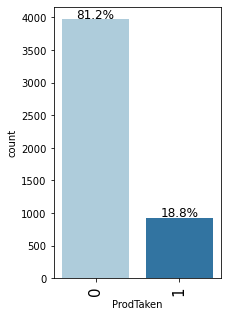

In [65]:
labeled_barplot(df, 'ProdTaken', perc=True)

# Bivariate & Multivariate Analysis

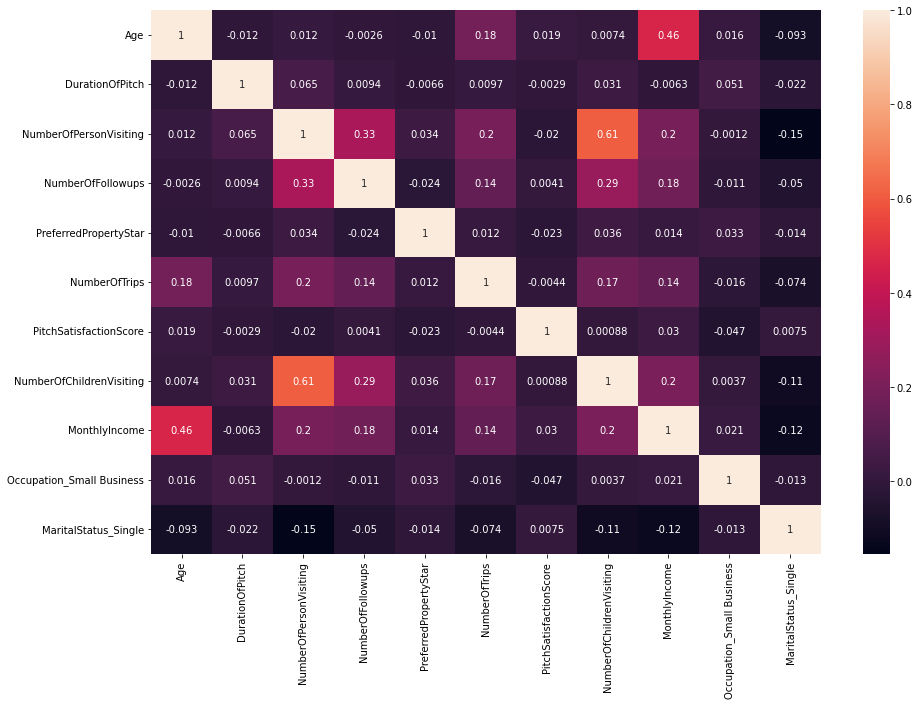

In [66]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# (TravelPackagePrediction-Ensemble Techniques)

* Age and MonthlyIncome has a slightly moderate correlation of .46.
* NumberofPersonVisiting has a slight correlation of NumberofFollowups of .33.
* NumberofPersonVisiting has the greatest correlation with NumberofChildrenVisiting of .61.
    * This correlation is logical because family trips tend to be more desirable.

In [67]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not taken Product',fontsize=12,fontweight='bold')
    sns.distplot(df[(df[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Product",fontsize=12,fontweight='bold')
    sns.distplot(df[(df[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product taken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(df[target],df[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(df[target],df[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()
    
    
# (TravelPackagePrediction-Ensemble Techniques)

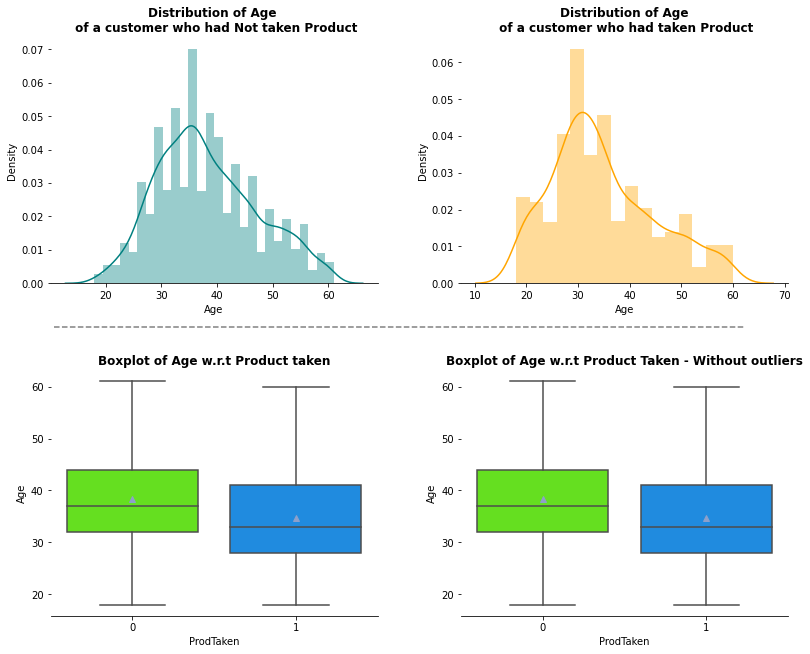

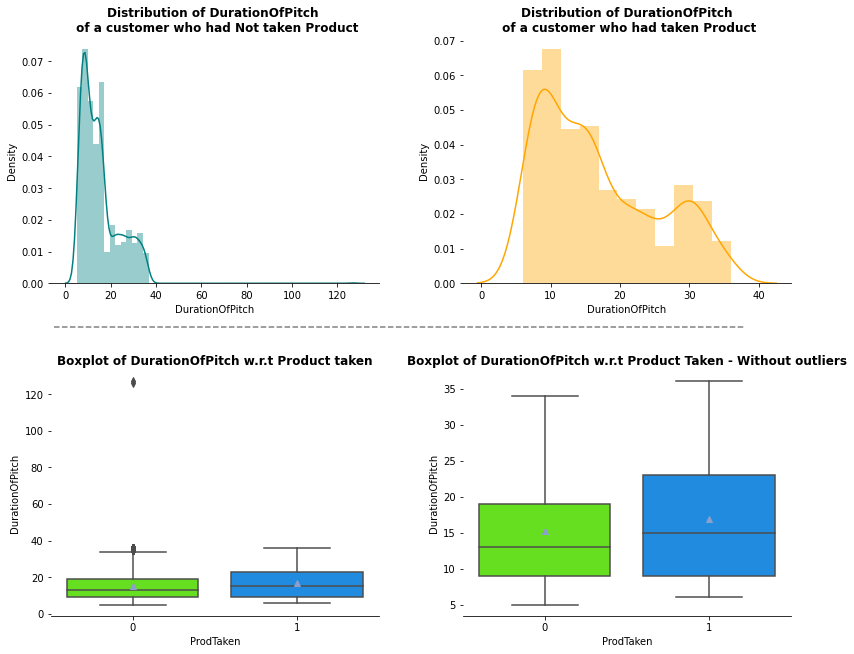

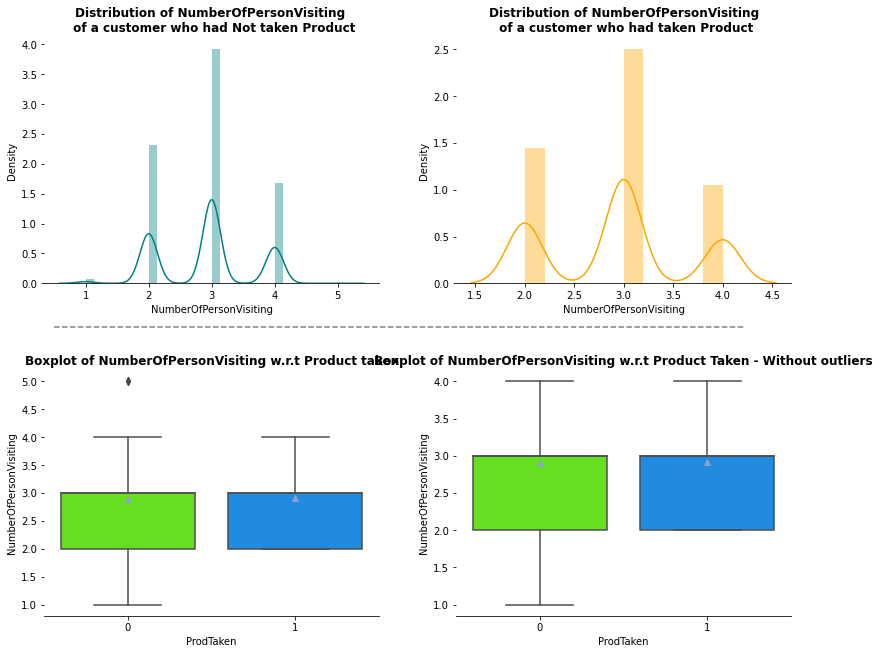

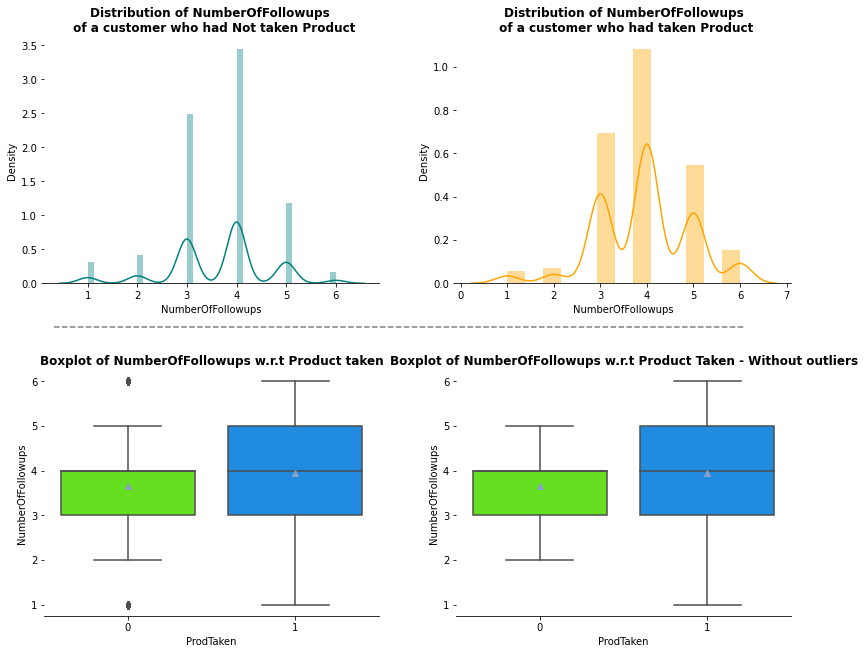

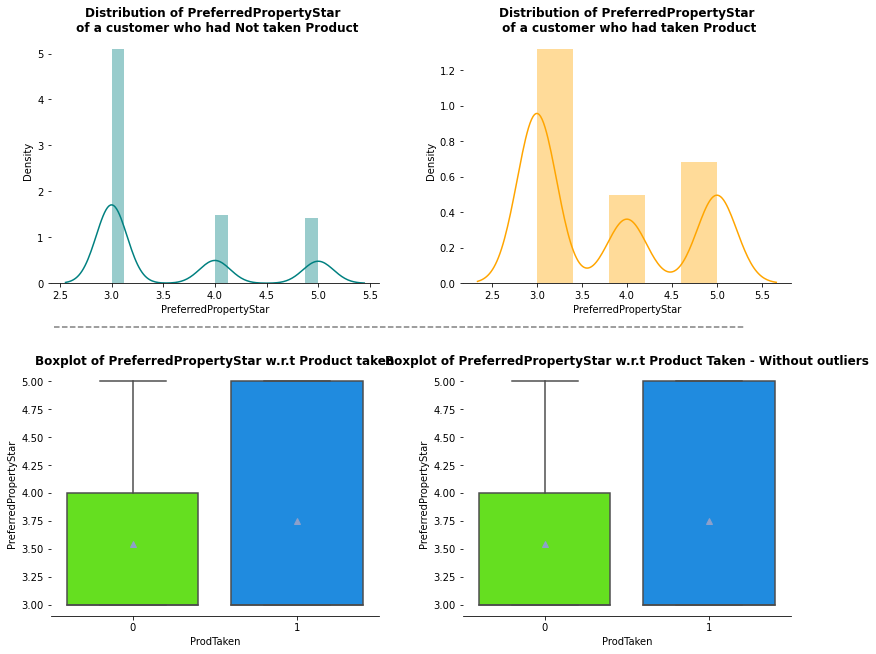

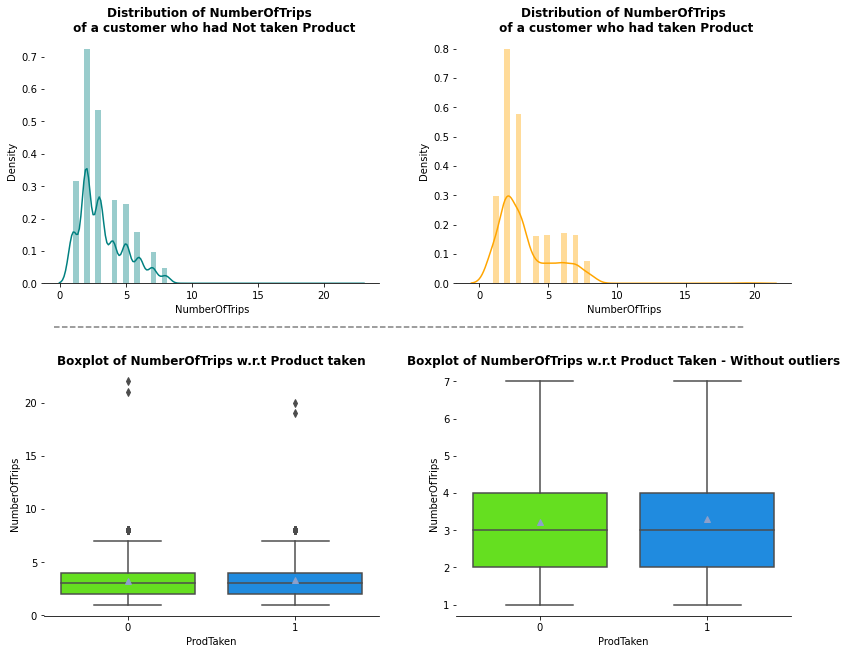

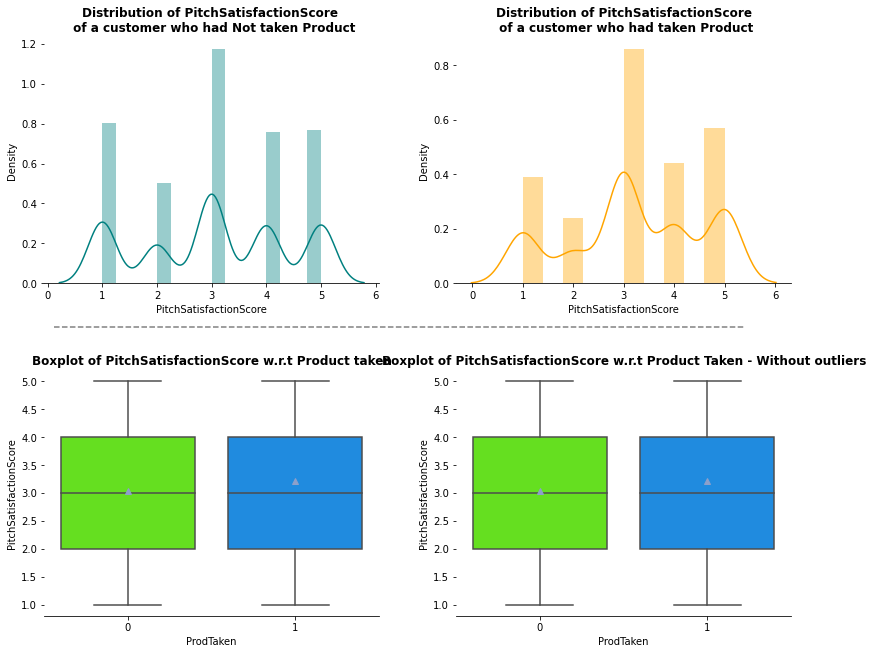

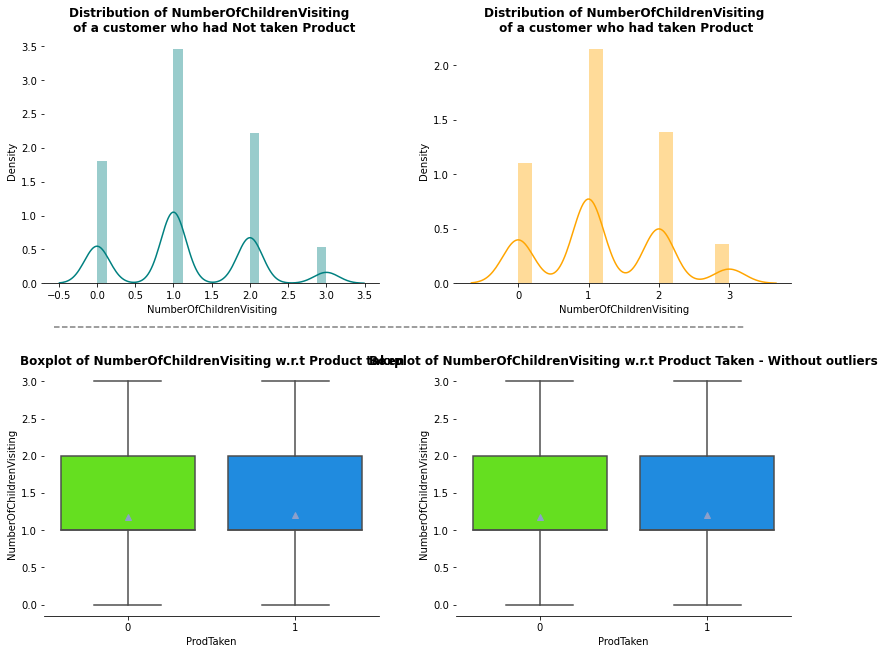

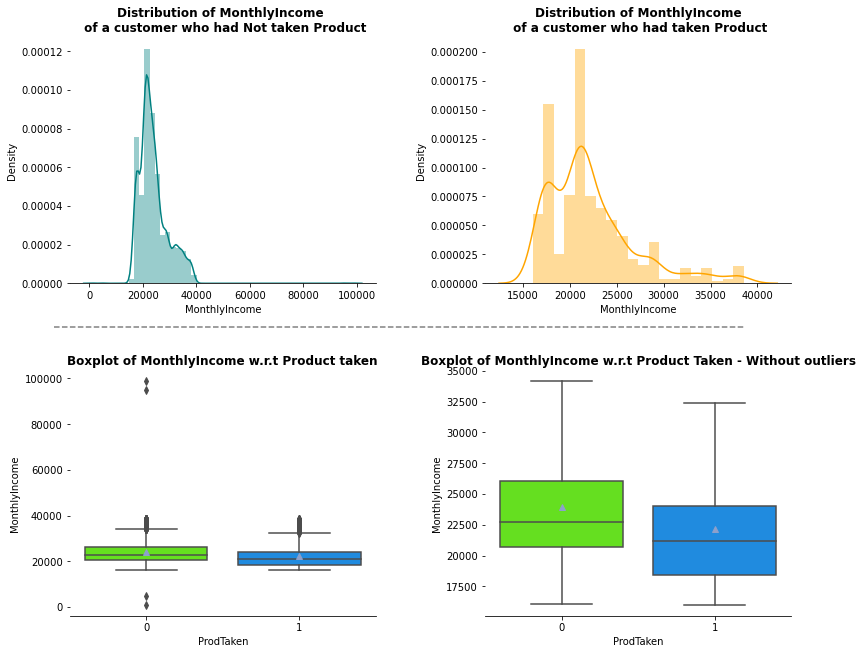

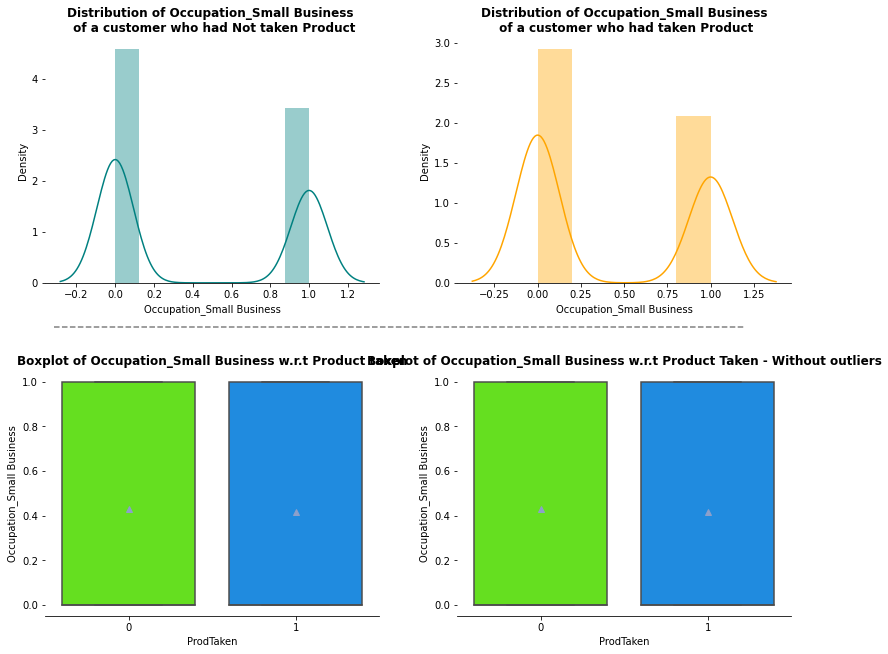

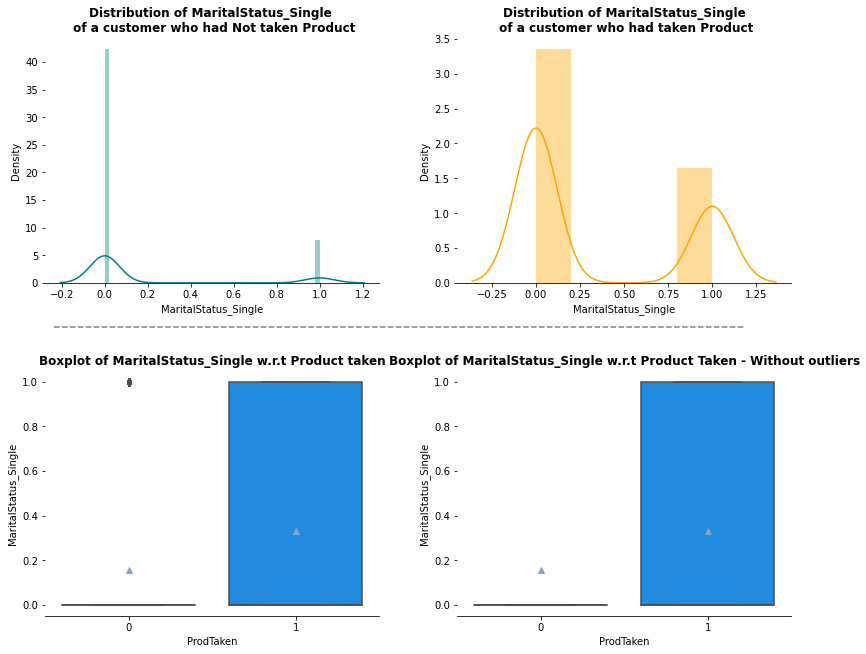

In [68]:
#select all quantitative columns for checking the spread
#list_col=  ['Age','DurationOfPitch','MonthlyIncome']
list_col=df.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
   plot(list_col[j])

# (TravelPackagePrediction-Ensemble Techniques)

* Age for customers who have purchased the product, 75% are between the ages of 28-40.
* DurationofPitch for customers who purchased the product, 75% of the pitch was between 8-23 minutes.
* NumberofFollowups for customers who purchased the product, 75% of the follow-ups are 3-5.
* PreferredPropertyStar for customers who purchased the product, 75% of the stars are 3-5.
* MonthlyIncome for customers who purchased the product, 75% of the monthly incomes range 18,000 - 23,000 dollars.




## Dealing with Missing Values and Treatment

In [69]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

# (Greatlearning Login)

DurationOfPitch              251
Agebin                       240
Incomebin                    233
MonthlyIncome                233
Age                          226
NumberOfTrips                140
NumberOfChildrenVisiting      66
NumberOfFollowups             45
PreferredPropertyStar         26
TypeofContact                 25
MaritalStatus_Single           0
MaritalStatus_4                0
Occupation_3                   0
MaritalStatus_1                0
Occupation_Small Business      0
Occupation_4                   0
MaritalStatus_2                0
ProdTaken                      0
Occupation_1                   0
Designation                    0
PitchSatisfactionScore         0
Passport                       0
ProductPitched                 0
NumberOfPersonVisiting         0
Gender                         0
CityTier                       0
OwnCar                         0
dtype: int64

* There are 10 features that have missing values that need to be treated.

## Missing value treatment for TypeofContact

In [70]:
df['TypeofContact'].value_counts()

# (TravelPackagePrediction-Ensemble Techniques)

0.0    3444
1.0    1419
Name: TypeofContact, dtype: int64

In [71]:
# missing value treatment for TypeofContact
df['TypeofContact'].value_counts()

# (TravelPackagePrediction-Ensemble Techniques)

0.0    3444
1.0    1419
Name: TypeofContact, dtype: int64

In [72]:
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)

# (Untitled)

In [73]:
#Verify if there are null values
df["TypeofContact"].isnull().sum()

# (Greatlearning Login)

0

In [74]:
df.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].median()

df['NumberOfFollowups']=df.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

# (TravelPackagePrediction-Ensemble Techniques)

In [75]:
df['PreferredPropertyStar']=df.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

df[df["PreferredPropertyStar"].isnull()]

# (TravelPackagePrediction-Ensemble Techniques)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Occupation_1,Occupation_3,Occupation_4,Occupation_Small Business,MaritalStatus_1,MaritalStatus_2,MaritalStatus_4,MaritalStatus_Single,Agebin,Incomebin


In [76]:
df.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()

# Impute missing Duration of pitch with median value
df["DurationOfPitch"] = df.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median())
)

# (TravelPackagePrediction-Ensemble Techniques)

In [77]:
df[df["DurationOfPitch"].isnull()]

df.isnull().sum()

# (Greatlearning Login)

ProdTaken                      0
Age                          226
TypeofContact                  0
CityTier                       0
DurationOfPitch                0
Gender                         0
NumberOfPersonVisiting         0
NumberOfFollowups              0
ProductPitched                 0
PreferredPropertyStar          0
NumberOfTrips                140
Passport                       0
PitchSatisfactionScore         0
OwnCar                         0
NumberOfChildrenVisiting      66
Designation                    0
MonthlyIncome                233
Occupation_1                   0
Occupation_3                   0
Occupation_4                   0
Occupation_Small Business      0
MaritalStatus_1                0
MaritalStatus_2                0
MaritalStatus_4                0
MaritalStatus_Single           0
Agebin                       240
Incomebin                    233
dtype: int64

In [78]:
# Impute missing NumberOfTrips of pitch with median value
df["NumberOfTrips"] = df.groupby(["MaritalStatus_1", 'MaritalStatus_2','MaritalStatus_4','MaritalStatus_Single'])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median())
)

# (TravelPackagePrediction-Ensemble Techniques)

In [79]:
df[df["NumberOfChildrenVisiting"].isnull()].head(10)

# (TravelPackagePrediction-Ensemble Techniques)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Occupation_1,Occupation_3,Occupation_4,Occupation_Small Business,MaritalStatus_1,MaritalStatus_2,MaritalStatus_4,MaritalStatus_Single,Agebin,Incomebin
165,0,50.0,0.0,1,17.0,1,2,3.0,5,4.0,4.0,0,5,1,NaN,5,34926.0,1,0,0,0,0,0,0,1,41-50,<35000
190,0,52.0,0.0,1,6.0,0,3,4.0,5,3.0,1.0,0,2,1,NaN,5,34999.0,1,0,0,0,0,1,0,0,51-65,<35000
568,1,55.0,0.0,1,8.0,0,3,3.0,5,5.0,6.0,1,2,1,NaN,5,34859.0,0,0,0,1,0,1,0,0,51-65,<35000
746,0,41.0,1.0,1,13.0,1,2,5.0,5,3.0,2.0,0,4,1,NaN,5,34973.0,1,0,0,0,1,0,0,0,41-50,<35000
749,1,52.0,0.0,3,8.0,1,2,5.0,5,3.0,2.0,0,3,1,NaN,5,34845.0,0,0,0,1,0,1,0,0,51-65,<35000
851,0,56.0,0.0,1,10.0,1,3,3.0,5,5.0,5.0,0,4,0,NaN,5,34943.0,0,1,0,0,1,0,0,0,51-65,<35000
898,0,43.0,0.0,1,9.0,0,3,5.0,5,3.0,4.0,0,5,1,NaN,5,34740.0,1,0,0,0,0,1,0,0,41-50,<35000
918,0,51.0,1.0,3,15.0,0,2,3.0,5,4.0,5.0,1,4,1,NaN,5,34847.0,1,0,0,0,1,0,0,0,51-65,<35000
956,0,56.0,0.0,2,14.0,0,2,3.0,5,4.0,7.0,0,4,1,NaN,5,34717.0,1,0,0,0,0,0,0,1,51-65,<35000
1009,0,58.0,0.0,1,6.0,1,3,3.0,5,5.0,4.0,1,1,1,NaN,5,34701.0,0,0,0,1,0,1,0,0,51-65,<35000


In [80]:
# Impute missing NumberOfChildrenVisited with 0
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

# (TravelPackagePrediction-Ensemble Techniques)

In [81]:
df[df["Age"].isnull()].head(10)

# (TravelPackagePrediction-Ensemble Techniques)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Occupation_1,Occupation_3,Occupation_4,Occupation_Small Business,MaritalStatus_1,MaritalStatus_2,MaritalStatus_4,MaritalStatus_Single,Agebin,Incomebin
4,0,NaN,0.0,1,8.0,0,2,3.0,1,4.0,1.0,0,5,1,0.0,0,18468.0,0,0,0,1,0,1,0,0,NaN,<20000
11,0,NaN,0.0,1,21.0,1,2,4.0,2,3.0,1.0,1,3,0,0.0,1,NaN,1,0,0,0,0,0,0,1,NaN,NaN
19,0,NaN,0.0,1,8.0,0,2,3.0,1,3.0,6.0,1,4,0,1.0,0,NaN,1,0,0,0,0,0,0,1,NaN,NaN
20,0,NaN,1.0,1,17.0,1,3,2.0,2,3.0,1.0,0,3,1,2.0,1,NaN,1,0,0,0,1,0,0,0,NaN,NaN
21,1,NaN,0.0,3,15.0,0,2,4.0,2,5.0,1.0,0,2,0,0.0,1,18407.0,1,0,0,0,0,0,0,1,NaN,<20000
26,1,NaN,1.0,1,22.0,1,3,5.0,1,5.0,2.0,1,4,1,2.0,0,NaN,1,0,0,0,0,0,0,1,NaN,NaN
44,0,NaN,1.0,1,6.0,1,2,3.0,2,3.0,2.0,0,3,1,0.0,1,NaN,0,0,0,1,0,0,0,1,NaN,NaN
51,1,NaN,0.0,1,11.0,0,2,3.0,1,3.0,2.0,1,2,1,0.0,0,18441.0,0,1,0,0,0,0,0,1,NaN,<20000
54,0,NaN,0.0,3,29.0,1,2,4.0,2,3.0,1.0,1,2,1,0.0,1,NaN,0,0,0,1,0,1,0,0,NaN,NaN
57,0,NaN,0.0,1,29.0,1,1,3.0,1,5.0,4.0,1,4,1,0.0,0,NaN,0,0,0,1,0,1,0,0,NaN,NaN


In [82]:
df.groupby(["Designation", "Gender","MaritalStatus_1",'MaritalStatus_2','MaritalStatus_4','MaritalStatus_Single'])["Age"].median()

# Impute missing Age with median value
df["Age"] = df.groupby(["Designation", "Gender","MaritalStatus_1",'MaritalStatus_2','MaritalStatus_4','MaritalStatus_Single'])["Age"].apply(
    lambda x: x.fillna(x.median())
)

# (TravelPackagePrediction-Ensemble Techniques)

In [83]:
df.groupby(["Occupation_1",'Occupation_3','Occupation_4','Occupation_Small Business','Designation','Gender'])["MonthlyIncome"].median()

# (TravelPackagePrediction-Ensemble Techniques)

Occupation_1  Occupation_3  Occupation_4  Occupation_Small Business  Designation  Gender
0             0             0             0                          0            0             NaN
                                                                                  1             NaN
                                                                     1            0             NaN
                                                                                  1             NaN
                                                                     3            0             NaN
                                                                                  1             NaN
                                                                     4            0             NaN
                                                                                  1             NaN
                                                                     5            0             NaN
           

In [84]:
df["MonthlyIncome"]=df.groupby(["Occupation_1",'Occupation_3','Occupation_4','Occupation_Small Business','Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median())
)

# (TravelPackagePrediction-Ensemble Techniques)

In [85]:
df.isnull().sum() #verify if all missing values have been treated

# (Greatlearning Login)

ProdTaken                      0
Age                            0
TypeofContact                  0
CityTier                       0
DurationOfPitch                0
Gender                         0
NumberOfPersonVisiting         0
NumberOfFollowups              0
ProductPitched                 0
PreferredPropertyStar          0
NumberOfTrips                  0
Passport                       0
PitchSatisfactionScore         0
OwnCar                         0
NumberOfChildrenVisiting       0
Designation                    0
MonthlyIncome                  0
Occupation_1                   0
Occupation_3                   0
Occupation_4                   0
Occupation_Small Business      0
MaritalStatus_1                0
MaritalStatus_2                0
MaritalStatus_4                0
MaritalStatus_Single           0
Agebin                       240
Incomebin                    233
dtype: int64

In [86]:
df['Agebin'] = pd.cut(df['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

# (TravelPackagePrediction-Ensemble Techniques)

In [87]:
df.Agebin.value_counts()

# (Greatlearning Login)

31-40    1894
41-50    1073
26-30    1025
51-70     549
15-25     347
Name: Agebin, dtype: int64

In [88]:
df['Incomebin'] = pd.cut(df['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

# (TravelPackagePrediction-Ensemble Techniques)

In [89]:
df.Incomebin.value_counts()

# (Greatlearning Login)

<25000     2490
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: Incomebin, dtype: int64

In [90]:
df.isnull().sum()

# (Greatlearning Login)

ProdTaken                    0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
Occupation_1                 0
Occupation_3                 0
Occupation_4                 0
Occupation_Small Business    0
MaritalStatus_1              0
MaritalStatus_2              0
MaritalStatus_4              0
MaritalStatus_Single         0
Agebin                       0
Incomebin                    0
dtype: int64

## Creating a Customer Profile by Product Type

In [91]:
cust_prof = df[df['ProdTaken'] == 1]

# (TravelPackagePrediction-Ensemble Techniques)

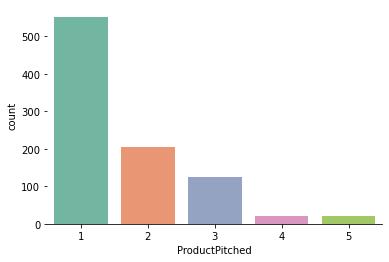

In [92]:
#plt.figure(figsize = [12,12])
sns.countplot(x = "ProductPitched", data = cust_prof)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

# (TravelPackagePrediction-Ensemble Techniques)

* 1 = Basic has the most count +500
* 2 = Deluxe is second with a count of 200
* 3 = Standard has a little over 100 counts
* 4 = Super Deluxe
* 5 = King
    * Both Super Deluxe and King have equal count

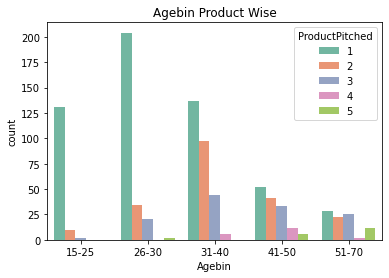

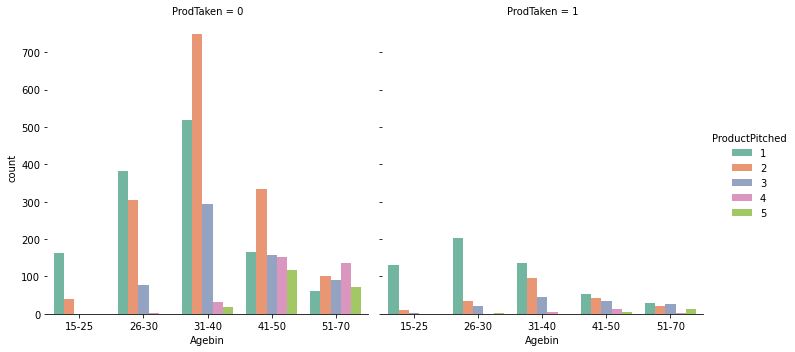

In [93]:
sns.countplot(x='Agebin',hue='ProductPitched',data=cust_prof).set_title('Agebin Product Wise')
sns.catplot(x='Agebin',hue='ProductPitched',col='ProdTaken',data=df,kind='count')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

# (TravelPackagePrediction-Ensemble Techniques)

### Customers who have purchased the product by Age Bins

* The Basic package was purchased by ages 26-30 the most, followed by 15-25, and 31-40 respectively.
* The Deluxe package was purchased by ages 31-40 the most, followed by 41-50, and 26-30 respectively.
* The Standard package was purchased by ages 31-40 the most, followed by 41-50, and 51-70 respectively.
* The Super Deluxe package was purchased by ages 41-50 the most, followed by 51-70.
* The King package was purchased by ages 51-70 the most, followed by 41-50.
* Overall, we see that the more expensive packages are purchased by the more senior customers ages 41-70. 
* The most volume sold are the less expensive packages like Basic and Deluxe, purchased by the younger customers ages 15-40.


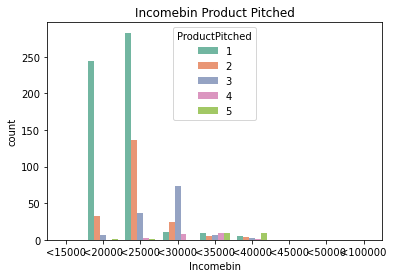

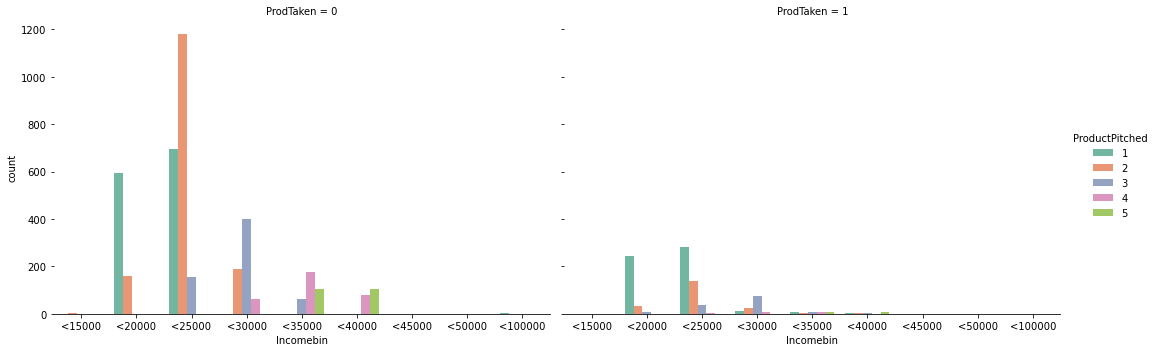

In [94]:
sns.countplot(x='Incomebin',hue='ProductPitched',data=cust_prof).set_title('Incomebin Product Pitched')
sns.catplot(x='Incomebin',hue='ProductPitched',col='ProdTaken',data=df,kind='count',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

# (TravelPackagePrediction-Ensemble Techniques)

## Customers who have purchased the product by Income Bins

* The Basic package was purchased the most by monthly incomes less than 25000 dollars and less than 20000 dollars respectively.
* The Deluxe package was purchased the most by monthly incomes less than 25000 dollars and less than 20000 dollars respectively.
* The Standard package was purchased the most by monthly incomes less than 30000 dollars and less than 25000 dollars respectively.
* The Super Deluxe package was purchased the most by monthly incomes less than 35000 dollars respectively.
* The King package was purchased the most by monthly incomes less than 40000 dollars respectively.
* Overall, we see that the more expensive packages are purchased by monthly incomes ranging in the less than 35000 to less than 40000 dollars. 
* The most volume sold are the less expensive packages like Basic and Deluxe, purchased by customers with monthly income ranging in the less than 20000 to less than 25000 dollars.



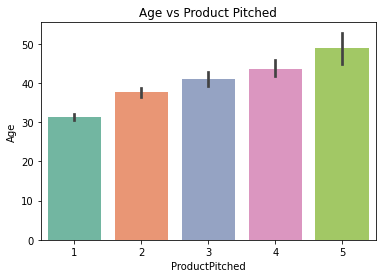

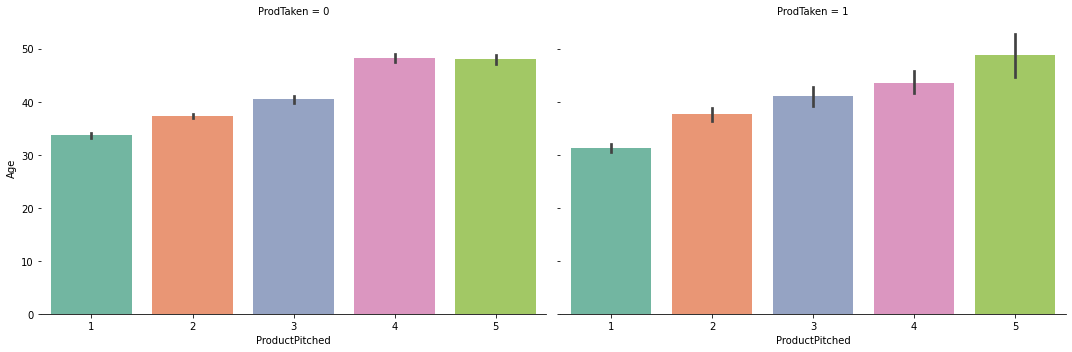

In [95]:
sns.barplot(y='Age',x='ProductPitched',data=cust_prof).set_title('Age vs Product Pitched')
sns.catplot(y='Age',x='ProductPitched',col='ProdTaken',data=df,kind='bar',aspect=1.5)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

# (TravelPackagePrediction-Ensemble Techniques)

## Age vs Product Pitched

* Most Basic packages are purchased by customers in their early 30s.
* Most Deluxe packages are purchased by customers in their mid-30s.
* Most Standard packages are purchased by customers in their 40s.
* Most Super Deluxe packages are purchased by customers in their early 40s.
* Most King packages are purchased by customers in their late 40s.



Text(0.5, 1.0, 'Monthly Income vs Occupation')

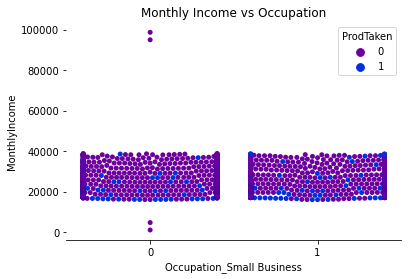

In [96]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))

sns.swarmplot(y='MonthlyIncome',x='Occupation_Small Business',hue='ProdTaken',data=df);
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Occupation')

# (TravelPackagePrediction-Ensemble Techniques)

* There is little varying with Occupation_Small Business when it comes to customers purchasing the packages or not purchasing the packages.
* The same can be said concerning MonthlyIncome, little varying.

Text(0.5, 1.0, 'Monthly Income vs Age')

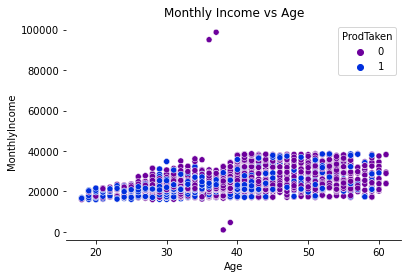

In [97]:
sns.set_palette(sns.color_palette("nipy_spectral", 8))
sns.scatterplot(y='MonthlyIncome',x='Age', hue='ProdTaken',data=df)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
plt.title('Monthly Income vs Age')

# (TravelPackagePrediction-Ensemble Techniques)

* We can see a several customers 43 years old and younger purchasing packages in the <30,000 dollar monthly income range.
* 29 year olds seem to purchase the most packages.

# Bivariate & Multivariate Analysis

* Age and MonthlyIncome has a slightly moderate correlation of .46.
* NumberofPersonVisiting and NumberofFollowups has a slight correlation of .33.
* NumberofPersonVisiting and NumberofChildrenVisiting has the greatest correlation of .61.
    * This correlation is logical because family and friends’ trips tend to be more desirable.
* Age for customers who have purchased the product, 75% are between the ages of 28-40.
* DurationofPitch for customers who purchased the product, 75% of the pitch was between 8-23 minutes.
* NumberofFollowups for customers who purchased the product, 75% of the follow-ups are 3-5.
* PreferredPropertyStar for customers who purchased the product, 75% of the stars are 3-5.
* MonthlyIncome for customers who purchased the product, 75% of the monthly incomes range 18,000 - 23,000 dollars.
* There are 10 features that have missing values that need to be treated.


# Creating a Customer Profile by Product Type

* **Basic Package:**  Basic package has the most count of +500. The Basic package was purchased by ages 26-30 the most, followed by 15-25, and 31-40 respectively. The Basic package was purchased the most by monthly incomes less than 25000 dollars and less than 20000 dollars respectively. Most Basic packages are purchased by customers in their early 30s.
* **Deluxe Package:** Deluxe package has the second most count of 200. The Deluxe package was purchased by ages 31-40 the most, followed by 41-50, and 26-30 respectively. The Deluxe package was purchased the most by monthly incomes less than 25000 dollars and less than 20000 dollars respectively. Most Deluxe packages are purchased by customers in their mid-30s.
* **Standard Package:** Standard package has a little over 100 counts. The Standard package was purchased by ages 31-40 the most, followed by 41-50, and 51-70 respectively. The Standard package was purchased the most by monthly incomes less than 30000 dollars and less than 25000 dollars respectively. Most Standard packages are purchased by customers in their 40s.
* **Super Deluxe Package:** Both Super Deluxe package and King package have equal count. The Super Deluxe package was purchased by ages 41-50 the most, followed by 51-70. The Super Deluxe package was purchased the most by monthly incomes less than 35000 dollars respectively. Most Super Deluxe packages are purchased by customers in their early 40s.
* **King Package:** The King package was purchased by ages 51-70 the most, followed by 41-50. The King package was purchased the most by monthly incomes less than 40000 dollars respectively. Most King packages are purchased by customers in their late 40s.

* Overall, we see that the more expensive packages are purchased by the more senior customers ages 41-70.
    * Also, we see that the more expensive packages are purchased by monthly incomes ranging in the less than 35000 to less than 40000 dollars.
* The most volume sold are the less expensive packages like Basic and Deluxe, purchased by the younger customers ages 15-40.
* The most volume sold are the less expensive packages like Basic and Deluxe, purchased by customers with monthly income ranging in the less than 20000 to less than 25000 dollars.



## Outlier Detection

In [98]:
Q1 = df.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = df.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

# (TravelPackagePrediction-Ensemble Techniques)

In [99]:
((df.select_dtypes(include=['float64','int64'])<lower) | (df.select_dtypes(include=['float64','int64'])>upper)).sum()/len(df)*100

# (TravelPackagePrediction-Ensemble Techniques)

Age                          0.000000
DurationOfPitch              2.291326
MaritalStatus_Single         0.000000
MonthlyIncome                7.528642
NumberOfChildrenVisiting     0.000000
NumberOfFollowups            6.382979
NumberOfPersonVisiting       0.061375
NumberOfTrips                2.229951
Occupation_Small Business    0.000000
PitchSatisfactionScore       0.000000
PreferredPropertyStar        0.000000
dtype: float64

## Treating outliers for MonthlyIncome and NumberofTrips

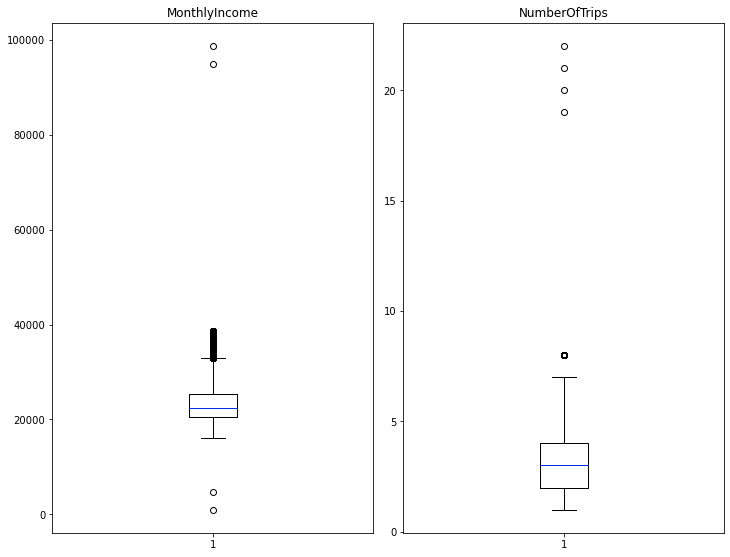

In [100]:
numeric_columns = ['MonthlyIncome','NumberOfTrips']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# (TravelPackagePrediction-Ensemble Techniques)

In [101]:
# Check MonthlyIncome extreme values
df.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

# (TravelPackagePrediction-Ensemble Techniques)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Occupation_1,Occupation_3,Occupation_4,Occupation_Small Business,MaritalStatus_1,MaritalStatus_2,MaritalStatus_4,MaritalStatus_Single,Agebin,Incomebin
2482,0,37.0,0.0,1,12.0,1,3,5.0,1,5.0,2.0,1,2,1,1.0,0,98678.0,1,0,0,0,0,1,0,0,31-40,<100000
38,0,36.0,0.0,1,11.0,1,2,4.0,1,3.0,1.0,1,2,1,0.0,0,95000.0,1,0,0,0,0,1,0,0,31-40,<100000
2634,0,53.0,0.0,1,7.0,0,4,5.0,5,3.0,2.0,0,2,1,2.0,5,38677.0,1,0,0,0,0,1,0,0,51-70,<40000
4104,0,53.0,0.0,1,7.0,0,4,5.0,5,3.0,2.0,0,1,1,3.0,5,38677.0,1,0,0,0,1,0,0,0,51-70,<40000
3190,0,42.0,1.0,1,14.0,1,3,6.0,5,3.0,3.0,0,4,1,1.0,5,38651.0,1,0,0,0,1,0,0,0,41-50,<40000


In [102]:
# Check NumberOfTrips extreme values
df.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

# (TravelPackagePrediction-Ensemble Techniques)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Occupation_1,Occupation_3,Occupation_4,Occupation_Small Business,MaritalStatus_1,MaritalStatus_2,MaritalStatus_4,MaritalStatus_Single,Agebin,Incomebin
3260,0,40.0,1.0,1,16.0,0,4,4.0,2,4.0,22.0,0,2,1,1.0,1,25460.0,1,0,0,0,0,0,1,0,31-40,<30000
816,0,39.0,1.0,1,15.0,0,3,3.0,2,4.0,21.0,0,2,1,0.0,1,21782.0,1,0,0,0,0,0,1,0,31-40,<25000
2829,1,31.0,1.0,1,11.0,0,3,4.0,1,3.0,20.0,1,4,1,2.0,0,20963.0,0,1,0,0,0,0,0,1,26-30,<25000
385,1,30.0,1.0,1,10.0,0,2,3.0,1,3.0,19.0,1,4,1,1.0,0,17285.0,0,1,0,0,0,0,0,1,26-30,<20000
3155,1,30.0,0.0,1,17.0,1,4,5.0,1,5.0,8.0,1,5,1,2.0,0,21082.0,1,0,0,0,0,0,0,1,26-30,<25000


### There are four observations with NumberofTrips 19 or greater

In [103]:
df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)]

# (TravelPackagePrediction-Ensemble Techniques)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Occupation_1,Occupation_3,Occupation_4,Occupation_Small Business,MaritalStatus_1,MaritalStatus_2,MaritalStatus_4,MaritalStatus_Single,Agebin,Incomebin
38,0,36.0,0.0,1,11.0,1,2,4.0,1,3.0,1.0,1,2,1,0.0,0,95000.0,1,0,0,0,0,1,0,0,31-40,<100000
142,0,38.0,0.0,1,9.0,1,2,3.0,2,3.0,4.0,1,5,0,0.0,1,1000.0,0,1,0,0,0,0,0,1,31-40,<15000
2482,0,37.0,0.0,1,12.0,1,3,5.0,1,5.0,2.0,1,2,1,1.0,0,98678.0,1,0,0,0,0,1,0,0,31-40,<100000
2586,0,39.0,0.0,1,10.0,1,3,4.0,2,3.0,5.0,1,5,0,1.0,1,4678.0,0,1,0,0,0,0,0,1,31-40,<15000


In [104]:
#Dropping observaions with duration of pitch greater than 40. There are 2 observations
df.drop(index=df[df.DurationOfPitch>37].index,inplace=True)

#Dropping observation with monthly income less than 12000 or greater than 40000. There are 4 observations
df.drop(index=df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)].index,inplace=True)

#Dropping observations with number of trips greater than 8. There are 4 observations
df.drop(index=df[df.NumberOfTrips>10].index,inplace=True)

# (TravelPackagePrediction-Ensemble Techniques)

# Split the dataset

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4887
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ProdTaken                  4878 non-null   category
 1   Age                        4878 non-null   float64 
 2   TypeofContact              4878 non-null   category
 3   CityTier                   4878 non-null   category
 4   DurationOfPitch            4878 non-null   float64 
 5   Gender                     4878 non-null   category
 6   NumberOfPersonVisiting     4878 non-null   int64   
 7   NumberOfFollowups          4878 non-null   float64 
 8   ProductPitched             4878 non-null   category
 9   PreferredPropertyStar      4878 non-null   float64 
 10  NumberOfTrips              4878 non-null   float64 
 11  Passport                   4878 non-null   category
 12  PitchSatisfactionScore     4878 non-null   int64   
 13  OwnCar                     4878 n

* When it comes to customer interaction data, this information will not be available for new and potential customers so I will drop columns related to customer interaction. 

In [106]:
# Separating target column
X = df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['ProdTaken']

# (TravelPackagePrediction-Ensemble Techniques)

In [107]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

# (Greatlearning Login)

((3414, 24), (1464, 24))

* We have 3,414 observations in the train set and 1,464 observations in the test set.

In [108]:
def make_confusion_matrix(y_actual,y_predict,title):
    '''Plot confusion matrix'''
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()
    
# (TravelPackagePrediction-Ensemble Techniques)

In [109]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
    if flag == True: 
          metric_names = ['Train_Accuracy', 'Test_Accuracy', 'Train_Recall', 'Test_Recall','Train_Precision',
                          'Test_Precision', 'Train_F1-Score', 'Test_F1-Score']
          cols = ['Metric', 'Score']
          records = [(name, score) for name, score in zip(metric_names, score_list)]
          display(pd.DataFrame.from_records(records, columns=cols, index='Metric').T)
          make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
          make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

# (TravelPackagePrediction-Ensemble Techniques)

In [110]:
# # defining empty lists to add train and test results 
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''add score of modelto list'''
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])
        
# (TravelPackagePrediction-Ensemble Techniques)

# Building Models 

* We'll fit different models on the train data and observe their performance, fitting Decision Tree, Bagging Classifier, and Random Forest models


# Decision Tree Model

In [111]:
dtree=DecisionTreeClassifier(random_state=1, class_weight={0:0.20, 1:0.80})
dtree.fit(X_train,y_train)

# (TravelPackagePrediction-Ensemble Techniques)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.859973,1.0,0.637681,1.0,0.626335,1.0,0.631957


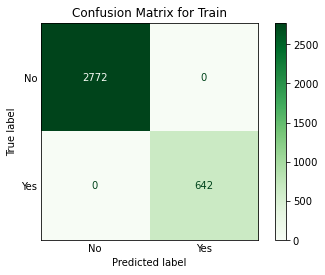

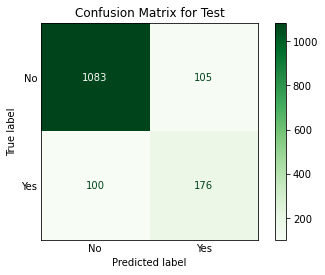

In [112]:
dtree_score=get_metrics_score(dtree,X_train,X_test,y_train,y_test)
add_score_model(dtree_score)

# (TravelPackagePrediction-Ensemble Techniques)

* The Decision tree model with default parameters is overfitting the train data; recall score needs to improve. 


# Bagging Classifier

In [113]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1, verbose=1)
bagging_classifier.fit(X_train,y_train)

# (TravelPackagePrediction-Ensemble Techniques)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


BaggingClassifier(random_state=1, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.989162,0.886612,0.942368,0.485507,1.0,0.848101,0.970329,0.617512


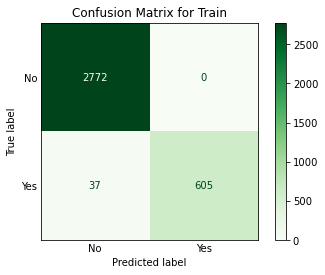

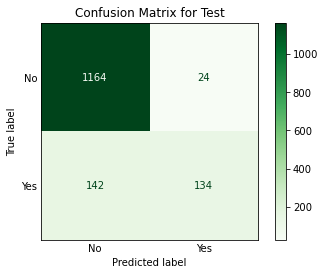

In [114]:
bagging_score=get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test)
add_score_model(bagging_score)

# (TravelPackagePrediction-Ensemble Techniques)

* Bagging is overfitting as well, Recall score has decreased on the test data.

# Random Forest

In [115]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

# (TravelPackagePrediction-Ensemble Techniques)

RandomForestClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,1.0,0.885246,1.0,0.467391,1.0,0.86,1.0,0.605634


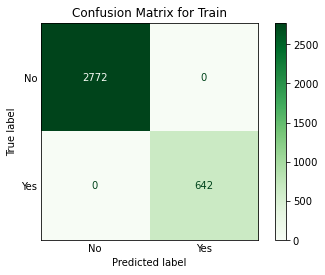

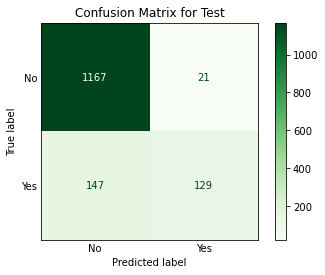

In [116]:
score_list_rf=get_metrics_score(rf_estimator,X_train,X_test,y_train,y_test)
add_score_model(score_list_rf)

# (TravelPackagePrediction-Ensemble Techniques)

Randon forest is overfitting the training data as well.

# Bagging Model Performance Evaluation and Improvement 

In [117]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

# (TravelPackagePrediction-Ensemble Techniques)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,1.000000,0.859973,1.000000,0.637681,1.0,0.626335,1.000000,0.631957
1,Bagging Classifier,0.989162,0.886612,0.942368,0.485507,1.0,0.848101,0.970329,0.617512
2,Random Forest,1.000000,0.885246,1.000000,0.467391,1.0,0.860000,1.000000,0.605634


* Without tuning the data, Bagging Classifier and Random Forest showed the best score for Accuracy; Decision Tree showed the best score for Recall and F1 score.


# Tuning Decision Tree

In [118]:
#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15], 
              'min_samples_leaf': [2,3,5],
              'max_leaf_nodes' : [ 5,7,10,15]
              
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

# (TravelPackagePrediction-Ensemble Techniques)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=4,
                       max_leaf_nodes=15, min_samples_leaf=2, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.798184,0.785519,0.574766,0.557971,0.470064,0.445087,0.517169,0.495177


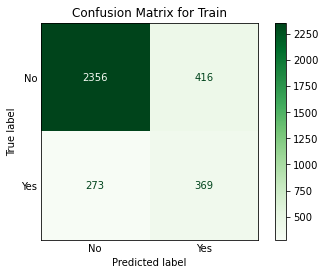

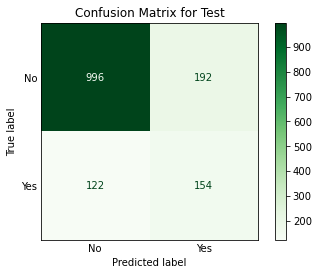

In [119]:
score_tune_dt=get_metrics_score(dtree_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_dt) # add score to dataframe

# (TravelPackagePrediction-Ensemble Techniques)

* Training data is not overfitting but test scores need improvement. 

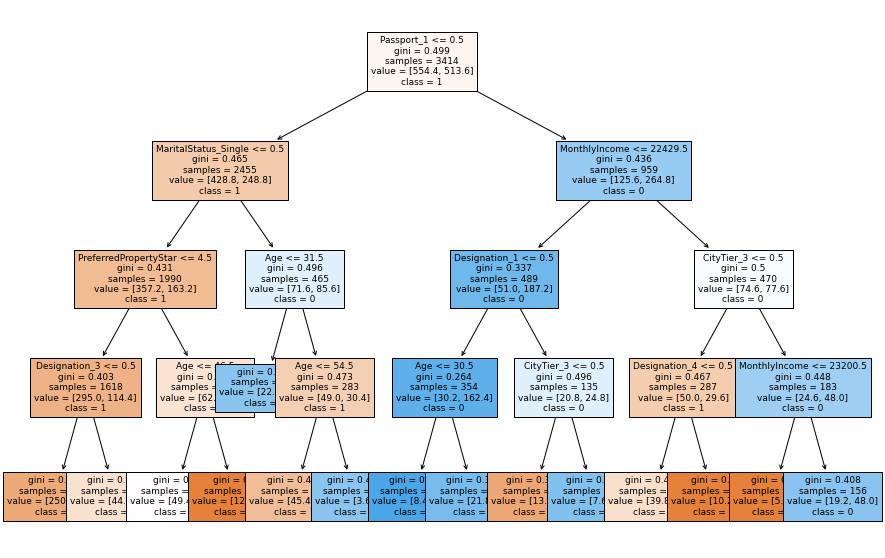

In [120]:
plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(dtree_tuned,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

# (TravelPackagePrediction-Ensemble Techniques)

In [121]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# (TravelPackagePrediction-Ensemble Techniques)

                                Imp
Passport_1                 0.368312
Age                        0.150593
MonthlyIncome              0.147896
MaritalStatus_Single       0.098914
CityTier_3                 0.089942
Designation_1              0.050758
PreferredPropertyStar      0.034435
Designation_3              0.034295
Designation_4              0.024855
MaritalStatus_2_1          0.000000
MaritalStatus_1_1          0.000000
Occupation_4_1             0.000000
Occupation_3_1             0.000000
Occupation_1_1             0.000000
Designation_5              0.000000
OwnCar_1                   0.000000
NumberOfTrips              0.000000
NumberOfPersonVisiting     0.000000
Gender_1                   0.000000
CityTier_2                 0.000000
TypeofContact_1.0          0.000000
Occupation_Small Business  0.000000
NumberOfChildrenVisiting   0.000000
MaritalStatus_4_1          0.000000


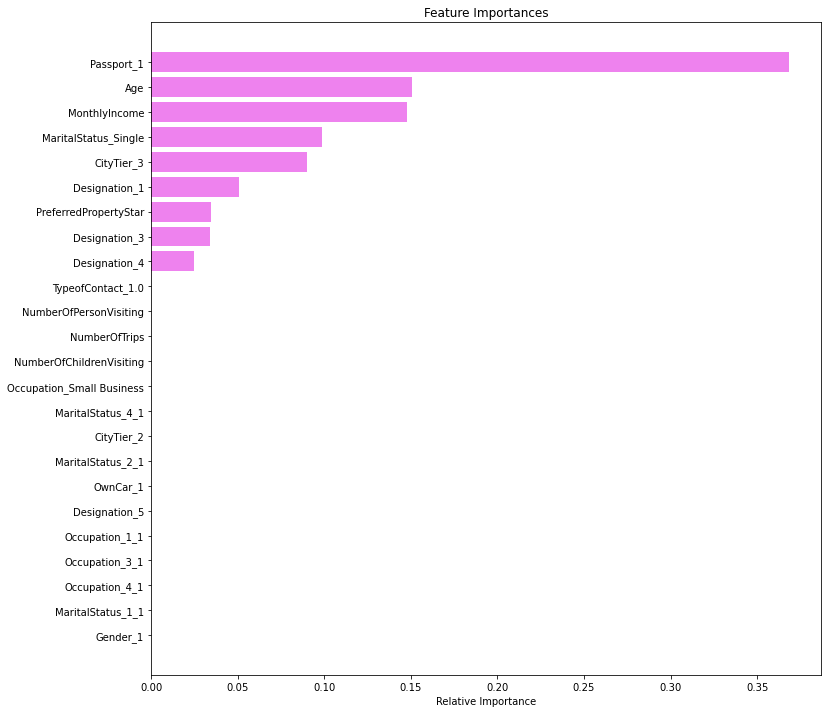

In [122]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# (TravelPackagePrediction-Ensemble Techniques)

* Most important features are having a Passport_1, Age, and MonthlyIncome

# Tuning Random Forest

In [123]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.20,1:0.80},random_state=1)

parameters = { "max_depth":[5,9,15],
               "n_estimators": [150,200,250,500],
               "min_samples_leaf": np.arange(5, 10),
                "max_features": ['auto'],
                "max_samples": np.arange(0.3,0.5, 0.7)
              }
# parameters = {"n_estimators": [50,80,150], 
#               "max_depth": [1,2,3], 
#               "min_samples_split": [3,4,6,7],"max_features": ['auto'],
#              }
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

# (TravelPackagePrediction-Ensemble Techniques)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=5,
                       max_features='auto', max_samples=0.3, min_samples_leaf=8,
                       n_estimators=150, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.825425,0.809426,0.593458,0.583333,0.532123,0.495385,0.561119,0.535774


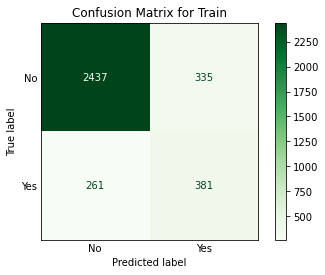

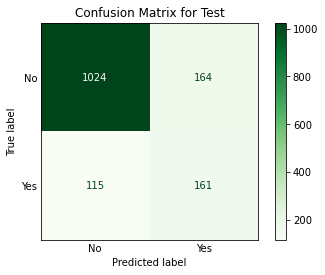

In [124]:
score_tune_rt=get_metrics_score(rf_tuned,X_train,X_test,y_train,y_test)
add_score_model(score_tune_rt) 

# (TravelPackagePrediction-Ensemble Techniques)

In [125]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# (TravelPackagePrediction-Ensemble Techniques)

                                Imp
Passport_1                 0.207146
MonthlyIncome              0.148667
Age                        0.144311
MaritalStatus_Single       0.063845
Designation_1              0.057818
MaritalStatus_1_1          0.049487
NumberOfTrips              0.044627
PreferredPropertyStar      0.041527
CityTier_3                 0.037272
Designation_4              0.032051
MaritalStatus_2_1          0.022600
MaritalStatus_4_1          0.018922
NumberOfChildrenVisiting   0.016903
NumberOfPersonVisiting     0.016359
Gender_1                   0.015744
TypeofContact_1.0          0.014466
OwnCar_1                   0.013088
Designation_3              0.012259
Occupation_1_1             0.010382
Occupation_3_1             0.010299
Occupation_Small Business  0.009760
Designation_5              0.008508
CityTier_2                 0.003959
Occupation_4_1             0.000000


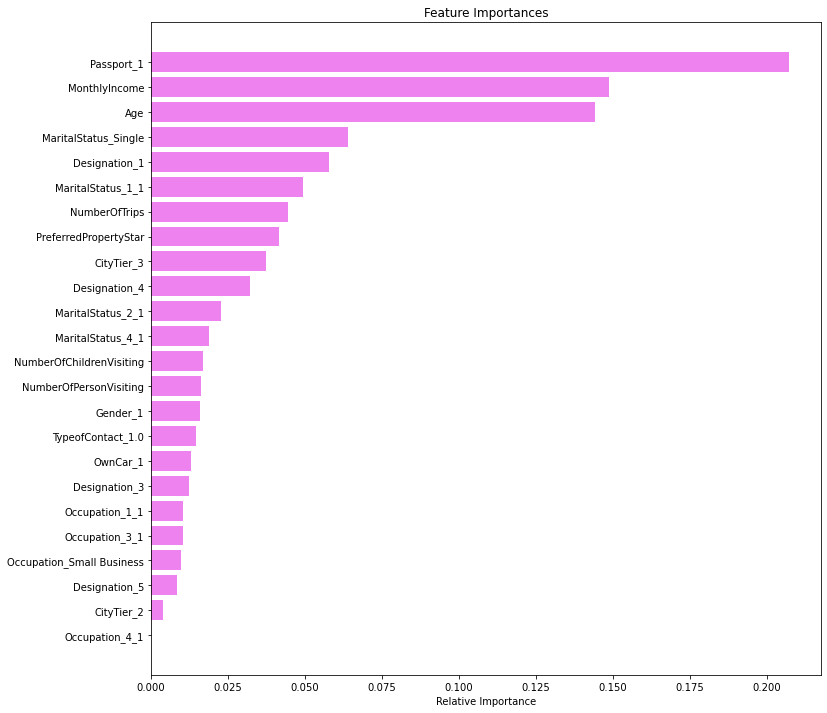

In [126]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# (TravelPackagePrediction-Ensemble Techniques)

* Most important features are having a Passport_1, MonthlyIncome, and Age

# Tuning Bagging Classifier

In [127]:
# Choose the type of classifier. 

bagging_estimator_tuned = BaggingClassifier(DecisionTreeClassifier(class_weight={0:0.20,1:0.80},random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

# (TravelPackagePrediction-Ensemble Techniques)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        random_state=1),
                  max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.999121,0.88388,0.995327,0.471014,1.0,0.844156,0.997658,0.604651


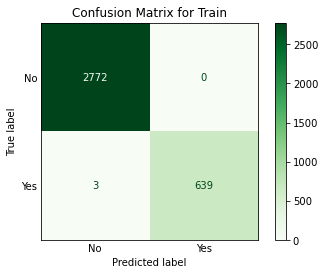

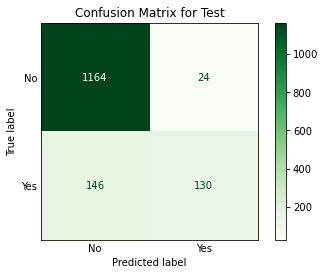

In [128]:
bagging_tuned=get_metrics_score(bagging_estimator_tuned,X_train,X_test,y_train,y_test)
add_score_model(bagging_tuned)

# (TravelPackagePrediction-Ensemble Techniques)

* Recall, Precision, and F1 Score data is overfitting and Recall and F1 Scores are not high enough.

## Comparing Models**

In [129]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Bagging Classifier',
                                          'Random Forest',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

# (TravelPackagePrediction-Ensemble Techniques)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,1.000000,0.859973,1.000000,0.637681,1.000000,0.626335,1.000000,0.631957
4,Tuned Random Forest,0.825425,0.809426,0.593458,0.583333,0.532123,0.495385,0.561119,0.535774
3,Tuned Decision Tree,0.798184,0.785519,0.574766,0.557971,0.470064,0.445087,0.517169,0.495177
1,Bagging Classifier,0.989162,0.886612,0.942368,0.485507,1.000000,0.848101,0.970329,0.617512
5,Tuned Bagging Classifier,0.999121,0.883880,0.995327,0.471014,1.000000,0.844156,0.997658,0.604651
2,Random Forest,1.000000,0.885246,1.000000,0.467391,1.000000,0.860000,1.000000,0.605634


* Accuracy - Tuned Randon Forest test score was close to the training data
* Recall - test scores were too low on all models
* Precision - where the test scores do not overfit, scores were too low
* F1 Score - test scores were too lowe on all models

# Boosting Model Building

## Adaboost

In [130]:
adaboost = AdaBoostClassifier(random_state=1)
adaboost.fit(X_train,y_train)

# (TravelPackagePrediction-Ensemble Techniques)

AdaBoostClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.843878,0.840164,0.29595,0.268116,0.701107,0.698113,0.41621,0.387435


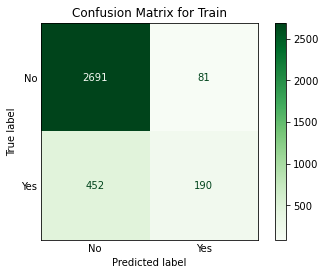

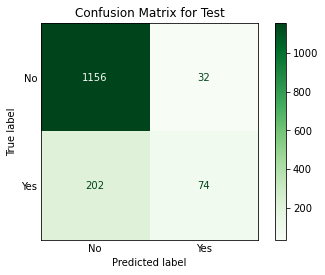

In [131]:
adaboost_score=get_metrics_score(adaboost,X_train,X_test,y_train,y_test)
add_score_model(adaboost_score)

# (TravelPackagePrediction-Ensemble Techniques)

* Recall scores and F1 Scores are low on both train and test data

## Gradient Boost

In [132]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

# (TravelPackagePrediction-Ensemble Techniques)

GradientBoostingClassifier(random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.87522,0.862022,0.423676,0.384058,0.829268,0.768116,0.560825,0.512077


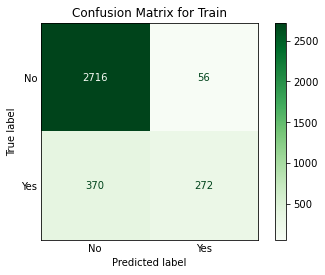

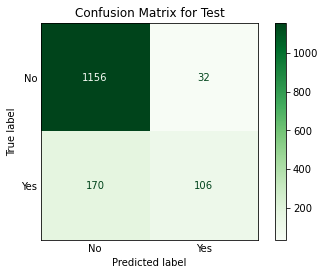

In [133]:
gbc_score=get_metrics_score(gbc,X_train,X_test,y_train,y_test)
add_score_model(gbc_score)

# (TravelPackagePrediction-Ensemble Techniques)

* Recall scores and F1 Scores are low on both train and test data

## XGBoost

In [134]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

# (TravelPackagePrediction-Ensemble Techniques)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.995313,0.883197,0.976636,0.543478,0.998408,0.769231,0.987402,0.636943


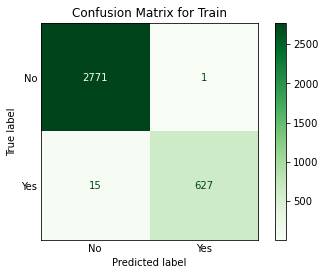

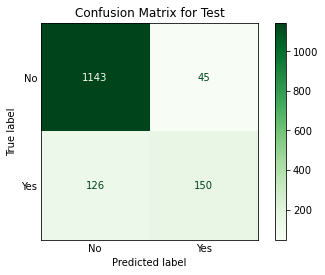

In [135]:
xgb_score=get_metrics_score(xgb,X_train,X_test,y_train,y_test)
add_score_model(xgb_score)

# (TravelPackagePrediction-Ensemble Techniques)

* Recall scores and F1 Scores are low on test data

## Feature Importance

In [136]:
feature_names = X_train.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# (TravelPackagePrediction-Ensemble Techniques)

                                Imp
Passport_1                 0.112503
Designation_1              0.070869
MaritalStatus_4_1          0.069177
MaritalStatus_Single       0.056815
Occupation_3_1             0.050331
Designation_4              0.048723
CityTier_3                 0.048404
Designation_3              0.044429
CityTier_2                 0.040747
NumberOfTrips              0.039762
Designation_5              0.039334
Occupation_Small Business  0.037804
Age                        0.037790
PreferredPropertyStar      0.035687
Gender_1                   0.035235
TypeofContact_1.0          0.035104
MonthlyIncome              0.034697
NumberOfPersonVisiting     0.030872
MaritalStatus_1_1          0.027556
OwnCar_1                   0.027076
MaritalStatus_2_1          0.026052
NumberOfChildrenVisiting   0.026022
Occupation_1_1             0.025012
Occupation_4_1             0.000000


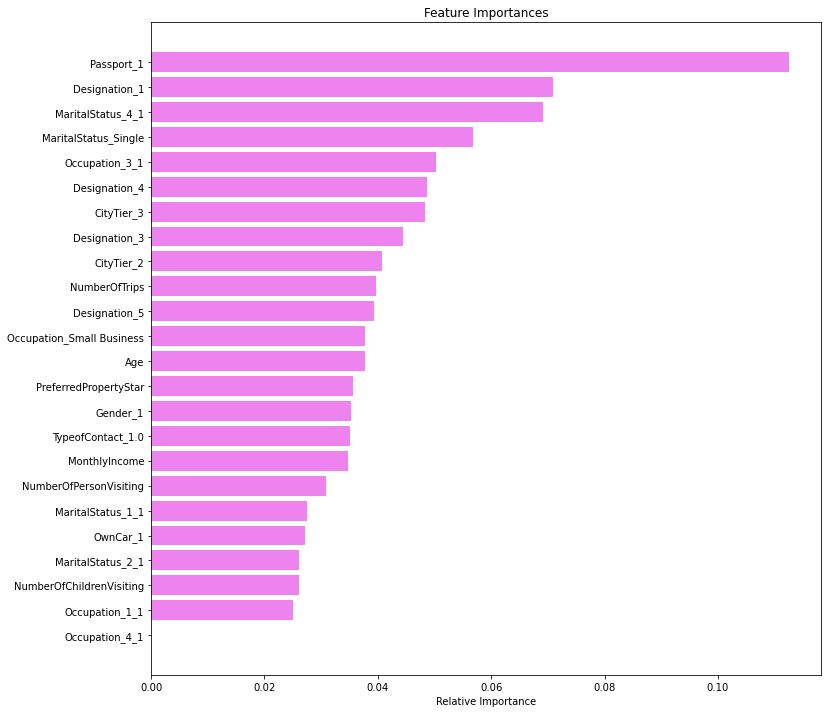

In [137]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# (TravelPackagePrediction-Ensemble Techniques)

* Most important features are having a Passport_1, Designation_1, and MaritalStatus_4_1

# Boosting Model Performance Evaluation and Improvement

In [138]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

# (TravelPackagePrediction-Ensemble Techniques)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,1.000000,0.859973,1.000000,0.637681,1.000000,0.626335,1.000000,0.631957
4,Tuned Random Forest,0.825425,0.809426,0.593458,0.583333,0.532123,0.495385,0.561119,0.535774
3,Tuned Decision Tree,0.798184,0.785519,0.574766,0.557971,0.470064,0.445087,0.517169,0.495177
8,XGboost,0.995313,0.883197,0.976636,0.543478,0.998408,0.769231,0.987402,0.636943
1,Random Forest,0.989162,0.886612,0.942368,0.485507,1.000000,0.848101,0.970329,0.617512
5,Tuned Bagging Classifier,0.999121,0.883880,0.995327,0.471014,1.000000,0.844156,0.997658,0.604651
2,Bagging Classifier,1.000000,0.885246,1.000000,0.467391,1.000000,0.860000,1.000000,0.605634
7,Gradient Boost,0.875220,0.862022,0.423676,0.384058,0.829268,0.768116,0.560825,0.512077
6,AdaBoost,0.843878,0.840164,0.295950,0.268116,0.701107,0.698113,0.416210,0.387435


# Model Performance Insights

### Accuracy 
* Decision Tree is overfitting
* Tuned Random Forest is generalizing well, with a test score is .81
* Tuned Decision Tree is generalizing well with a slightly lower test score than Tuned Random Forest
* XGBoost has a high-test score but seems to be overfitting a little
* Random Forest has a high-test score but seems to be overfitting a little
* Tuned Bagging Classifier has a high-test score but seems to be overfitting a little
* Bagging Classifier is overfitting
* Gradient Boost is generalizing well, with a test score of .86
* AdaBoost is generalizing well, with a test score of .84
    * For Accuracy Scores the best performing models:
        1. Gradient Boost
        2. AdaBoost
        3. Tuned Random Forest

### Recall
* Decision Tree is overfitting
* Tuned Random Forest is generalizing well, but training and test scores are low; test score .58
* Tuned Decision Tree is generalizing well, but training and test scores are low; test score .56
* XGBoost is overfitting
* Random Forest is overfitting
* Tuned Bagging Classifier is overfitting
* Bagging Classifier is overfitting
* Gradient Boost is generalizing well, but training and test scores are low; test score .38
* AdaBoost is generalizing well, but training and test scores are very low; test score .27
    * For Recall Scores the best performing models:
        1. Tuned Random Forest
        2. Tuned Decision Tree
        3. Gradient Boost
            * Because the following Recall Scores are low these models are not recommended

### Precision
* Decision Tree is overfitting
* Tuned Random Forest is generalizing well, but training and test scores are low; test score .50
* Tuned Decision Tree is generalizing well, but training and test scores are low; test score .45
* XGBoost is overfitting
* Random Forest is overfitting
* Tuned Bagging Classifier is overfitting
* Bagging Classifier is overfitting
* Gradient Boost is generalizing well, with a test score of .77
* AdaBoost is generalizing well, with a test score of .70
    * For Precision Scores the best performing models:
        1. Gradient Boost
        2. AdaBoost
        3. Tuned Random Forest

### F1 Score
* Decision Tree is overfitting
* Tuned Random Forest is generalizing well, but training and test scores are low; test score .54
* Tuned Decision Tree is generalizing well, but training and test scores are low; test score .50
* XGBoost is overfitting
* Random Forest is overfitting
* Tuned Bagging Classifier is overfitting
* Bagging Classifier is overfitting
* Gradient Boost is generalizing well, but training and test scores are low; test score .51
* AdaBoost is generalizing well, but training and test scores are very low; test score .39
    * For Recall Scores the best performing models:
        1. Tuned Random Forest
        2. Tuned Decision Tree
        3. Gradient Boost
            * Because the following F1 Scores are low these models are not recommended


## Tuned AdaBoost Classifier

In [139]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(10,50,100),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

# (TravelPackagePrediction-Ensemble Techniques)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.9, n_estimators=10, random_state=1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.846807,0.838115,0.334891,0.322464,0.691318,0.640288,0.451207,0.428916


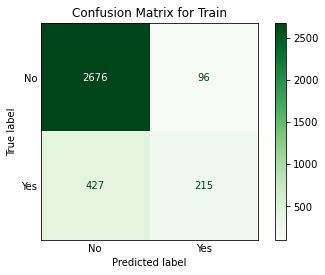

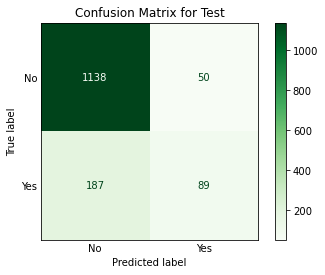

In [140]:
abc_tuned_score=get_metrics_score(abc_tuned,X_train,X_test,y_train,y_test)
add_score_model(abc_tuned_score)

# (TravelPackagePrediction-Ensemble Techniques)

* Recall score has slightly improved but is still low on the training and test data
* Precision score has reduced slightly on trianing and test data
* F1 Score has slightly improved but is still low on the training and test data 

In [141]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(abc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# (TravelPackagePrediction-Ensemble Techniques)

                                Imp
MonthlyIncome              0.191846
PreferredPropertyStar      0.140173
Age                        0.092392
Passport_1                 0.089231
CityTier_3                 0.083244
NumberOfTrips              0.072648
Designation_1              0.062630
MaritalStatus_Single       0.056057
MaritalStatus_4_1          0.047036
Occupation_Small Business  0.037677
Designation_4              0.036083
TypeofContact_1.0          0.031569
Occupation_1_1             0.030754
Designation_3              0.028660
CityTier_2                 0.000000
Gender_1                   0.000000
NumberOfPersonVisiting     0.000000
OwnCar_1                   0.000000
Designation_5              0.000000
Occupation_3_1             0.000000
Occupation_4_1             0.000000
MaritalStatus_1_1          0.000000
MaritalStatus_2_1          0.000000
NumberOfChildrenVisiting   0.000000


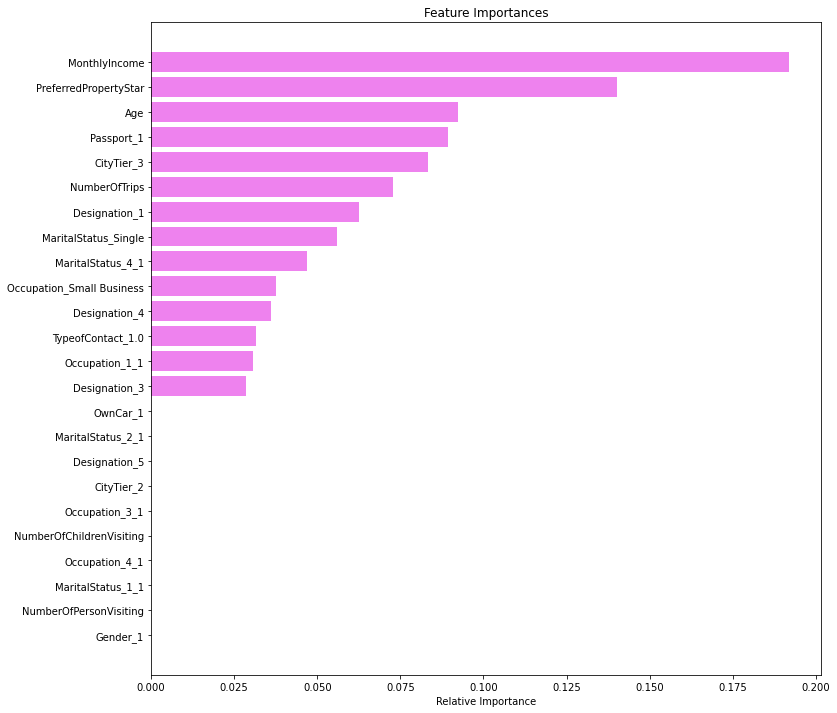

In [142]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# (TravelPackagePrediction-Ensemble Techniques)

* Most important features are MonthlyIncome, PreferredPropertyStar, and Age

 ## Tuned Gradient Boosting Classifier

In [143]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

# (TravelPackagePrediction-Ensemble Techniques)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.911834,0.860656,0.576324,0.431159,0.927318,0.716867,0.710855,0.538462


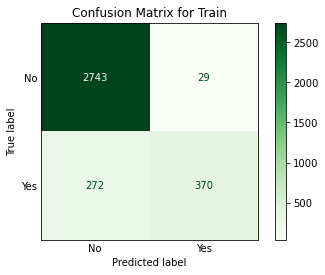

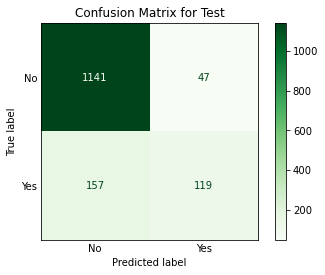

In [144]:
gbc_tuned_score=get_metrics_score(gbc_tuned,X_train,X_test,y_train,y_test)
add_score_model(gbc_tuned_score)

# (TravelPackagePrediction-Ensemble Techniques)

* Recall score has slightly improved with Tuned Gradient Boosting Classifier but is still low on the training and test data
* Precision score is overfitting
* F1 Score has improved but is still low on the training and test data

In [145]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# (TravelPackagePrediction-Ensemble Techniques)

                                Imp
MonthlyIncome              0.271603
Age                        0.184233
Passport_1                 0.133946
NumberOfTrips              0.060325
MaritalStatus_Single       0.049812
Designation_1              0.047892
PreferredPropertyStar      0.043778
CityTier_3                 0.037689
MaritalStatus_4_1          0.029028
Occupation_3_1             0.018992
CityTier_2                 0.015058
Gender_1                   0.014340
TypeofContact_1.0          0.014194
Designation_3              0.013424
NumberOfPersonVisiting     0.011994
Occupation_Small Business  0.010013
MaritalStatus_1_1          0.009691
Designation_4              0.008270
Occupation_1_1             0.007396
NumberOfChildrenVisiting   0.007291
Designation_5              0.007073
OwnCar_1                   0.002738
MaritalStatus_2_1          0.001220
Occupation_4_1             0.000000


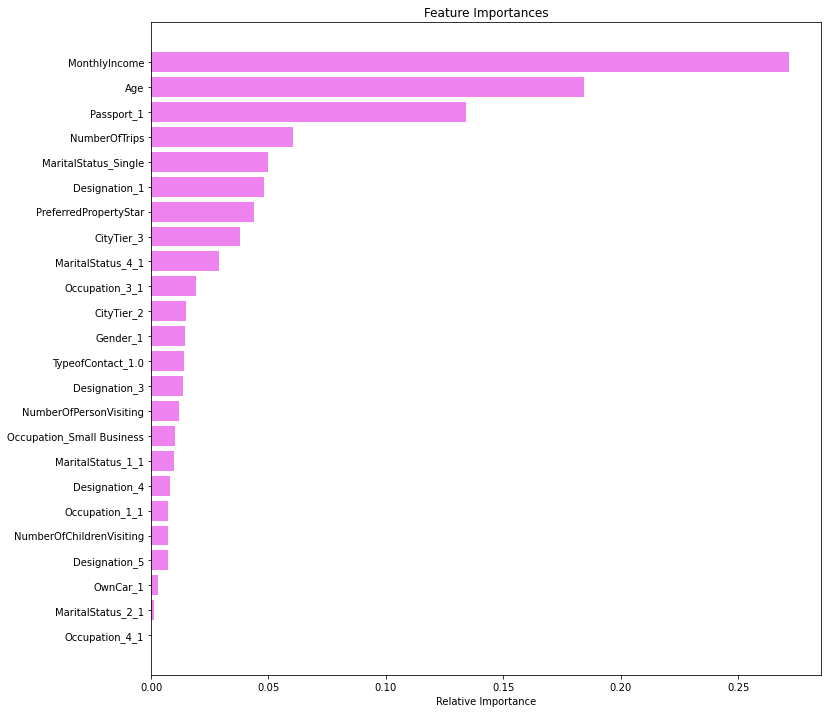

In [146]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# (TravelPackagePrediction-Ensemble Techniques)

* Most important features are MonthlyIncome, Age, and Pasport_1

## Tuned XGBoost Classifier

In [147]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,5],
    "colsample_bylevel":[0.5,1],
    "learning_rate":[0.001,0.01,0.1,0.5]
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

# (TravelPackagePrediction-Ensemble Techniques)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.909783,0.828552,0.94081,0.721014,0.691076,0.533512,0.796834,0.613251


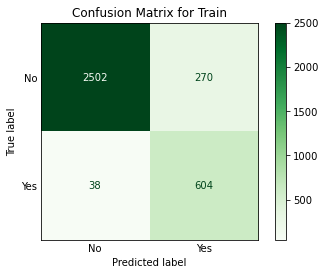

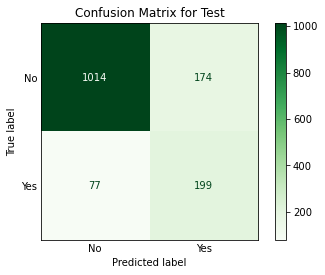

In [148]:
xgb_tuned_score=get_metrics_score(xgb_tuned,X_train,X_test,y_train,y_test)
add_score_model(xgb_tuned_score)

# (TravelPackagePrediction-Ensemble Techniques)

* Recall score has improved with Tuned XGBoost Classifier both training and test data
* Precision score has reduced but is not overfitting
* F1 Score has improved on the training and test data, test score is still low

In [149]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# (TravelPackagePrediction-Ensemble Techniques)

                                Imp
Passport_1                 0.217824
MaritalStatus_Single       0.068244
Designation_4              0.051616
Designation_1              0.051425
MaritalStatus_4_1          0.048382
MaritalStatus_1_1          0.042130
CityTier_3                 0.041622
PreferredPropertyStar      0.040132
MonthlyIncome              0.038286
Designation_3              0.038182
Age                        0.034815
Designation_5              0.034349
CityTier_2                 0.032282
Occupation_3_1             0.031284
NumberOfTrips              0.030643
Occupation_Small Business  0.028639
Gender_1                   0.028537
Occupation_1_1             0.028349
TypeofContact_1.0          0.025823
NumberOfPersonVisiting     0.024308
NumberOfChildrenVisiting   0.023165
MaritalStatus_2_1          0.021553
OwnCar_1                   0.018408
Occupation_4_1             0.000000


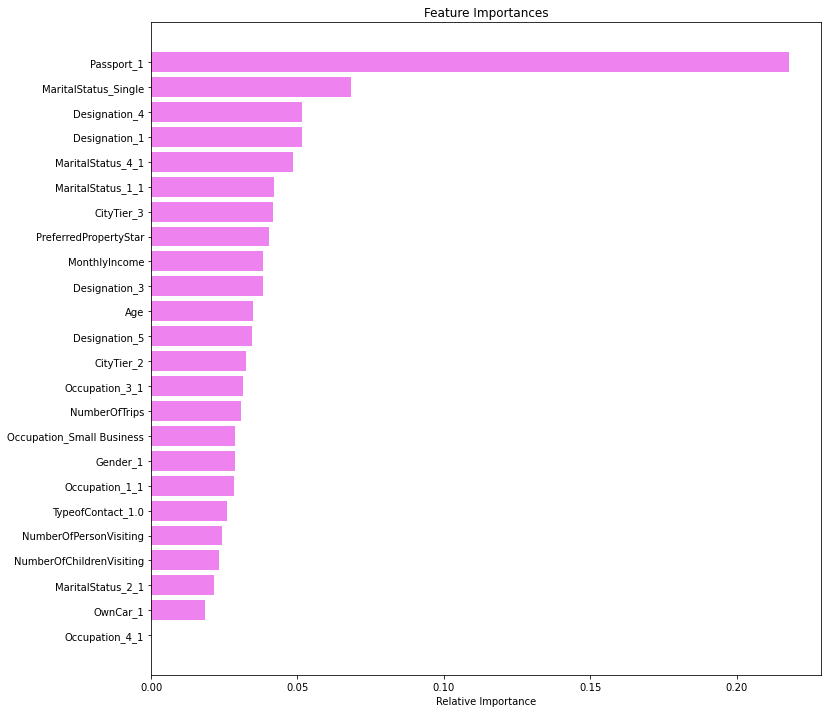

In [150]:
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# (TravelPackagePrediction-Ensemble Techniques)

Most important features are Passport_1, MaritalStatus_Single, and Designation_4

# Stacking Classifier

### Building a stacking model with tuned models
    * Decision Tree
    * Random Forest
    * Adaboosting
    * Gradient Boosting
    * Using XGBoost to get final prediction

In [151]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),('AdaBoost',abc_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1,eval_metric='logloss')

# (TravelPackagePrediction-Ensemble Techniques)

In [152]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5,n_jobs=-1)
stacking_estimator.fit(X_train,y_train)

# (TravelPackagePrediction-Ensemble Techniques)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_depth=4,
                                                       max_leaf_nodes=15,
                                                       min_samples_leaf=2,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_depth=5,
                                                       max_features='auto',
                                                       max_samples=0.3,
                                                       min_samples_leaf=8,
                                                       n_estimators=150,
                                                       random_state=1)),
                               ('AdaBoost',
                                Ada...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1,
                                                 reg_alpha=None,
                                                 reg_lambda=None, ...),
                   n_jobs=-1)

Metric,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1-Score,Test_F1-Score
Score,0.90041,0.855874,0.619938,0.521739,0.805668,0.64574,0.700704,0.577154


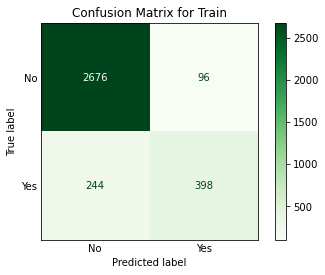

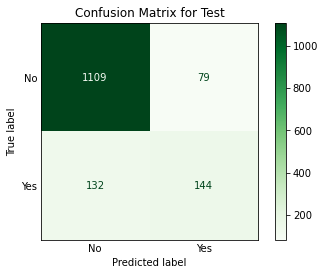

In [153]:
stacking_estimator=get_metrics_score(stacking_estimator,X_train,X_test,y_train,y_test)

# (TravelPackagePrediction-Ensemble Techniques)

* Accuracy score has the best results on training and test data
* Recall score has reduced both training and test data
* Precision score has increased but is overfitting and the test score is low
* F1 Score has reduced on the training and test data and scores are too low

In [154]:
add_score_model(stacking_estimator)

# (TravelPackagePrediction-Ensemble Techniques)

# Comparing all Models

In [155]:
omparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Tuned Bagging Classifier',
                                          'AdaBoost',
                                          'Gradient Boost',
                                          'XGboost',
                                          'Tuned AdaBoost',
                                          'Tuned Gradient Boost',
                                          'Tuned XGboost','Stacking'
                                          ], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1':f1_train,
                                          'Test_F1':f1_test  }) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

# (TravelPackagePrediction-Ensemble Techniques)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1
0,Decision Tree,1.000000,0.859973,1.000000,0.637681,1.000000,0.626335,1.000000,0.631957
4,Tuned Random Forest,0.825425,0.809426,0.593458,0.583333,0.532123,0.495385,0.561119,0.535774
3,Tuned Decision Tree,0.798184,0.785519,0.574766,0.557971,0.470064,0.445087,0.517169,0.495177
8,XGboost,0.995313,0.883197,0.976636,0.543478,0.998408,0.769231,0.987402,0.636943
1,Random Forest,0.989162,0.886612,0.942368,0.485507,1.000000,0.848101,0.970329,0.617512
5,Tuned Bagging Classifier,0.999121,0.883880,0.995327,0.471014,1.000000,0.844156,0.997658,0.604651
2,Bagging Classifier,1.000000,0.885246,1.000000,0.467391,1.000000,0.860000,1.000000,0.605634
7,Gradient Boost,0.875220,0.862022,0.423676,0.384058,0.829268,0.768116,0.560825,0.512077
6,AdaBoost,0.843878,0.840164,0.295950,0.268116,0.701107,0.698113,0.416210,0.387435


# Model Performance Insights

### Accuracy 
* Decision Tree is slightly overfitting; test score is .86 which is good
* Tuned Random Forest is generalizing well, with a test score is .81
* Tuned Decision Tree is generalizing well, with a test score is .79
* XGBoost is slightly overfitting; test score is .88 which is good 
* Random Forest is slightly overfitting; test score is .89 which is good 
* Tuned Bagging Classifier is slightly overfitting; test score is .88 which is good 
* Bagging Classifier is slightly overfitting; test score is .89 which is good 
* Gradient Boost is generalizing well, with a test score of .86
* AdaBoost is generalizing well, with a test score of .84

    * For Accuracy Scores the best performing models:
        1. Gradient Boost
        2. AdaBoost
        3. Tuned Random Forest

### Recall
* Decision Tree is overfitting
* Tuned Random Forest is generalizing well, but training and test scores are low; test score .58
* Tuned Decision Tree is generalizing well, but training and test scores are low; test score .56
* XGBoost is overfitting
* Random Forest is overfitting
* Tuned Bagging Classifier is overfitting
* Bagging Classifier is overfitting
* Gradient Boost is generalizing well, but training and test scores are low; test score .38
* AdaBoost is generalizing well, but training and test scores are very low; test score .27
    * For Recall Scores the best performing models:
        1. Tuned Random Forest
        2. Tuned Decision Tree
        3. Gradient Boost
            * Because the following Recall Scores are low these models are not recommended

### Precision
* Decision Tree is overfitting
* Tuned Random Forest is generalizing well, but training and test scores are low; test score .50
* Tuned Decision Tree is generalizing well, but training and test scores are low; test score .45
* XGBoost is overfitting
* Random Forest is overfitting
* Tuned Bagging Classifier is overfitting
* Bagging Classifier is overfitting
* Gradient Boost is generalizing well, with a test score of .77
* AdaBoost is generalizing well, with a test score of .70
    * For Precision Scores the best performing models:
        1. Gradient Boost
        2. AdaBoost
        3. Tuned Random Forest

### F1 Score
* Decision Tree is overfitting
* Tuned Random Forest is generalizing well, but training and test scores are low; test score .54
* Tuned Decision Tree is generalizing well, but training and test scores are low; test score .50
* XGBoost is overfitting
* Random Forest is overfitting
* Tuned Bagging Classifier is overfitting
* Bagging Classifier is overfitting
* Gradient Boost is generalizing well, but training and test scores are low; test score .51
* AdaBoost is generalizing well, but training and test scores are very low; test score .39
    * For Recall Scores the best performing models:
        1. Tuned Random Forest
        2. Tuned Decision Tree
        3. Gradient Boost
            * Because the following F1 Scores are low these models are not recommended


### Observations
* Gradient Boost gives a more generalized model.
* XGBoost overfits in all the models, maybe tuning XGBoost with different parameters will give a more generalized model.


## Conclusion

* Looking at feature importance Passport_1, MonthlyIncome, Age, Designation_1, and MaritalStatus_4_1 are most important features. 
* Occupation_4_1 seemed to be insignificant.


# Actionable Insights and Recommendations

We have built a predictive model that "Visit with us" can use to identify potential customers willing to purchase their new Wellness Tourism Package. 

"Visit with us" should target the customers with the following profiles:
* Most important features that have an impact on Product taken: Passport_1, MonthlyIncome, Age, Designation_1, and MaritalStatus_4_1 
* Customers with a Passport, with MonthlyIncome between less than 20,000 and 25,000 dollars, with Ages between 31-40, with Designation as Manager, and Unmarried have higher chances of purchasing the new Wellness Tourism Package from "Visit with us".
* According to the EDA, the customer interaction data which helps the chances of the customer purchasing the new Wellness Tourism Package are:
    * Duration of pitch should average around 16 minutes
    * Aim for a Pitch Satisfaction Score of 3 or more
    * Number of Follow ups with the customer no less than 4 times.
    
* According to the EDA, 71% (3,466) of the customers do not have a Passport compared to 29% (1,422) of the customers who do have Passport. "Visit with us" should help customers get Passports with the purchase of the new Wellness Tourism Package by either giving the customers a certain percentage voucher that goes toward the purchase of the Passport by purchasing the new Wellness Tourism Package. Something to this marketing tool will increase the chances of customers purchasing the new Wellness Tourism Package.
* Unmarried customers are also high targets.

 
    
 



# References

Greatlearning Login. https://olympus.mygreatlearning.com/login

Python Read Multiple Excel Sheets. www.youtube.com, https://www.youtube.com/watch?v=2yCjqmsEQIA

TravelPackagePrediction-Ensemble Techniques. https://kaggle.com/code/yogidsba/travelpackageprediction-ensemble-techniques

Travel Package Purchase Prediction. https://kaggle.com/code/dscodingp19/travel-package-purchase-prediction. 

Untitled. https://stackoverflow.com/questions/42789324/how-to-pandas-fillna-with-mode-of-column.